# 1，展示结果，以各类ETF作为“股票池”

In [1]:
import cv_strategy
import pandas as pd
import tushare as ts
from matplotlib import pyplot as plt
from matplotlib import animation
import numpy as np
import akshare as ak

In [2]:
# ETF持仓
pool_1=['512660','512800',# 军工、银行
        '513330','515220',# 恒生科技、煤炭
        '159996','512010',# 家电、医药
        '159825','159865',# 农业、养殖
        '159732','159995',# 消费电子、芯片
        '518880','501018',# 黄金、原油
        '159766','512690',# 旅游，酒
        '515700','515790',# 新能车、光伏
        '159985',#'511260',# 豆粕期货，十年国债ETF
        '159941', '513030',#'513080',#'513880',#,         # nasdaq,德国，法国cac40，日本225 
        '512980','512720',         # 传媒, 计算机
        '513360',                  # 教育

#       '563000','510300','510500',# 中国A50，hs300, zz500
       ]
am = cv_strategy.cv_strategy(pool_1)
am.get_close(ktype_='M')
# 价格修正：由于tushare读取的ETF数据未进行复权，因此需要手动对数据进行复权。
am.close.loc['2022-07-05':,'159941']=am.close.loc['2022-07-05':,'159941']/0.604*2.416
am.close.loc[:'2021-05-14','512690'] = am.close.loc[:'2021-05-14','512690']/2.644*0.972
am.close.loc['2021-05-15':'2021-12-30','512690'] = am.close.loc['2021-05-15':'2021-12-30','512690']/1.323*0.973
am.close.loc[:'2021-06-25','512010'] = am.close.loc[:'2021-06-25','512010']/3.206*0.836
am.run(operation_pct_in=4/len(am.stock_pool),
      operation_pct_out=0.5,
      operation_pct_clr=1,
      period=2)

2023-11-06-09:31:58
本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2


C:\Users\Lenovo\anaconda3\Lib\site-packages\tushare\stock\trading.py:706: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(_get_k_data(url, dataflag,


本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2


C:\Users\Lenovo\anaconda3\Lib\site-packages\tushare\stock\trading.py:706: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(_get_k_data(url, dataflag,


本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2


C:\Users\Lenovo\anaconda3\Lib\site-packages\tushare\stock\trading.py:706: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(_get_k_data(url, dataflag,


本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2


C:\Users\Lenovo\anaconda3\Lib\site-packages\tushare\stock\trading.py:706: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(_get_k_data(url, dataflag,


本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2


C:\Users\Lenovo\anaconda3\Lib\site-packages\tushare\stock\trading.py:706: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(_get_k_data(url, dataflag,


本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2


C:\Users\Lenovo\anaconda3\Lib\site-packages\tushare\stock\trading.py:706: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(_get_k_data(url, dataflag,


本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2


C:\Users\Lenovo\anaconda3\Lib\site-packages\tushare\stock\trading.py:706: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(_get_k_data(url, dataflag,


本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2


C:\Users\Lenovo\anaconda3\Lib\site-packages\tushare\stock\trading.py:706: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(_get_k_data(url, dataflag,


本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2


C:\Users\Lenovo\anaconda3\Lib\site-packages\tushare\stock\trading.py:706: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(_get_k_data(url, dataflag,


本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2


C:\Users\Lenovo\anaconda3\Lib\site-packages\tushare\stock\trading.py:706: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(_get_k_data(url, dataflag,


本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2


C:\Users\Lenovo\anaconda3\Lib\site-packages\tushare\stock\trading.py:706: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(_get_k_data(url, dataflag,


本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2


KeyboardInterrupt: 

In [ ]:
am.visualization(control_group='hs300')
# print(am.compare.pct_change().tail(5))

# 2，cv_strategy介绍

## 2.1：底层逻辑与参数介绍

cv，即变异系数，度量数据离散程度的一种方式，表达式如下。可以理解为“围绕平均值的合理波动范围”。例如 cv = 0.1, 即表示“大多数情况下，围绕均值的合理波动范围为±10%”
$$cv = \frac{标准差}{平均值}$$

以动态视角来理解cv：

当cv增加时（dcv > 0），数组有远离均值的趋势，此时如果数组最后一个数高于均值，则可理解为“数组在增长过程中远离均值”此时建议增加该类资产配置。而如果数组最后一个值小于均值，且dcv > 0，则意味着“数组在下降过程中远离均值”，此时建议及时止损。

而当cv减小时（dcv < 0），数组有向均值靠拢的趋势。此时如果最新值大于均值，则意味着上升动能不足，此时选择撤出部分投资，以降低该类资产对整体组合带来的波动。而当最新值小于均值，则意味着资产价格快速下跌的趋势结束，但并不等同于资产价格回升，资产仍有可能缓慢下降或企稳筑底，此时如果选择抄底并不稳妥，建议观望或在有很大把握的情况下适当参与。

据上所述，策略中相应设置了3个参数：


$买入比例：\frac{4}{标的池中标的数量} (默认值，表示“在当前时点，如果标的池中有1/4的标的出现买入信号，则会花光所有现金用于加仓”)$


$收益增强比例：0.5（默认值，表示当上升行情结束后，撤出当前持仓的1/2以降低波动对整体组合的影响）$


$止损比例：1（默认值，表示当资产出现下跌情况后，卖出当前持仓的全部以止损）$

## 2.2：以沪深300指数的可视化说明

In [ ]:
import tushare as ts
import pandas as pd
from matplotlib import pyplot as plt

In [88]:
hs300 = ts.get_k_data('hs300').set_index('date')['close']
hs300_ma50 = hs300.rolling(50).mean()
hs300_std50 = hs300.rolling(50).std()
hs300_cv50 = hs300_std50/hs300_ma50

本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2


C:\Users\Lenovo\anaconda3\Lib\site-packages\tushare\stock\trading.py:706: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(_get_k_data(url, dataflag,


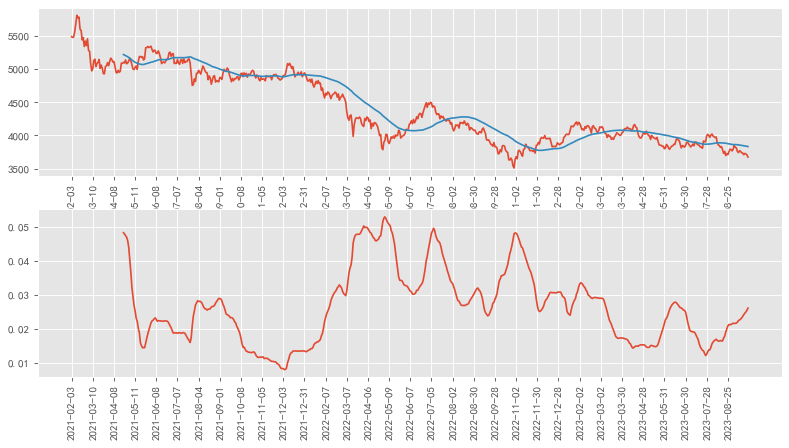

In [89]:
plt.figure(figsize=[12,6],dpi=80)
ax1 = plt.subplot(211)
ax1.plot(hs300)
ax1.plot(hs300_ma50)
ax1.set_xticks(hs300.index[::20])
ax1.set_xticklabels(hs300.index[::20],rotation=90)

ax2=plt.subplot(212,sharex=ax1)
ax2.plot(hs300_cv50)
ax2.set_xticks(hs300.index[::20])
ax2.set_xticklabels(hs300.index[::20],rotation=90)

plt.show()

# 3，经cv_strategy优化后的曲线：

对难以控制的资产类别可降低波动率；对强势的资产不仍有较好收益；对风险较大的资产可及时撤出

以沪深300指数、比亚迪（002594）、恒瑞医药（600276）为例，可以明显看出策略对于控制波动方面有显著作用

## 3.1：对难以把握的资产：降低波动、增加可控性：沪深300指数

In [230]:
pool=['hs300']#'399372','399373','399374','399375','399376','399377'
test_pool = [pool]
test = cv_strategy.cv_strategy(pool)
test.get_close(date_start = '2015-04-01',ktype_='M')

2023-10-26-08:53:14
本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2


C:\Users\Lenovo\anaconda3\Lib\site-packages\tushare\stock\trading.py:706: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(_get_k_data(url, dataflag,
C:\Users\Lenovo\anaconda3\Lib\site-packages\tushare\stock\trading.py:706: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(_get_k_data(url, dataflag,
C:\Users\Lenovo\anaconda3\Lib\site-packages\tushare\stock\trading.py:706: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(_get_k_data(url, dataflag,
C:\Users\Lenovo\anaconda3\Lib\site-packages\tushare\stock\trading.py:706: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(_get_k_

本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2


C:\Users\Lenovo\anaconda3\Lib\site-packages\tushare\stock\trading.py:706: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(_get_k_data(url, dataflag,
C:\Users\Lenovo\anaconda3\Lib\site-packages\tushare\stock\trading.py:706: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(_get_k_data(url, dataflag,
C:\Users\Lenovo\anaconda3\Lib\site-packages\tushare\stock\trading.py:706: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(_get_k_data(url, dataflag,
C:\Users\Lenovo\anaconda3\Lib\site-packages\tushare\stock\trading.py:706: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(_get_k_

2015-06-30
卖——割肉： hs300
2015-07-31
无操作: hs300
2015-08-31
无操作: hs300
2015-09-30
无操作: hs300
2015-10-30
买——追涨： hs300
2015-11-30
卖——逃顶： hs300
2015-12-31
买——追涨： hs300
2016-01-29
卖——逃顶： hs300
2016-02-29
无操作: hs300
2016-03-31
买——追涨： hs300
2016-04-29
卖——逃顶： hs300
2016-05-31
无操作: hs300
2016-06-30
卖——割肉： hs300
2016-07-29
买——追涨： hs300
2016-08-31
无操作: hs300
2016-09-30
卖——逃顶： hs300
2016-10-31
买——追涨： hs300
2016-11-30
无操作: hs300
2016-12-30
卖——逃顶： hs300
2017-01-26
无操作: hs300
2017-02-28
无操作: hs300
2017-03-31
无操作: hs300
2017-04-28
卖——割肉： hs300
2017-05-31
买——追涨： hs300
2017-06-30
无操作: hs300
2017-07-31
卖——逃顶： hs300
2017-08-31
买——追涨： hs300
2017-09-29
卖——逃顶： hs300
2017-10-31
买——追涨： hs300
2017-11-30
卖——逃顶： hs300
2017-12-29
买——追涨： hs300
2018-01-31
无操作: hs300
2018-02-28
卖——逃顶： hs300
2018-03-30
无操作: hs300
2018-04-27
卖——割肉： hs300
2018-05-31
无操作: hs300
2018-06-29
无操作: hs300
2018-07-31
无操作: hs300
2018-08-31
无操作: hs300
2018-09-28
无操作: hs300
2018-10-31
无操作: hs300
2018-11-30
无操作: hs300
2018-12-28
无操作: hs300
2019-01-31

C:\Users\Lenovo\anaconda3\Lib\site-packages\tushare\stock\trading.py:706: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(_get_k_data(url, dataflag,
C:\Users\Lenovo\anaconda3\Lib\site-packages\tushare\stock\trading.py:706: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(_get_k_data(url, dataflag,
C:\Users\Lenovo\anaconda3\Lib\site-packages\tushare\stock\trading.py:706: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(_get_k_data(url, dataflag,
C:\Users\Lenovo\anaconda3\Lib\site-packages\tushare\stock\trading.py:706: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(_get_k_

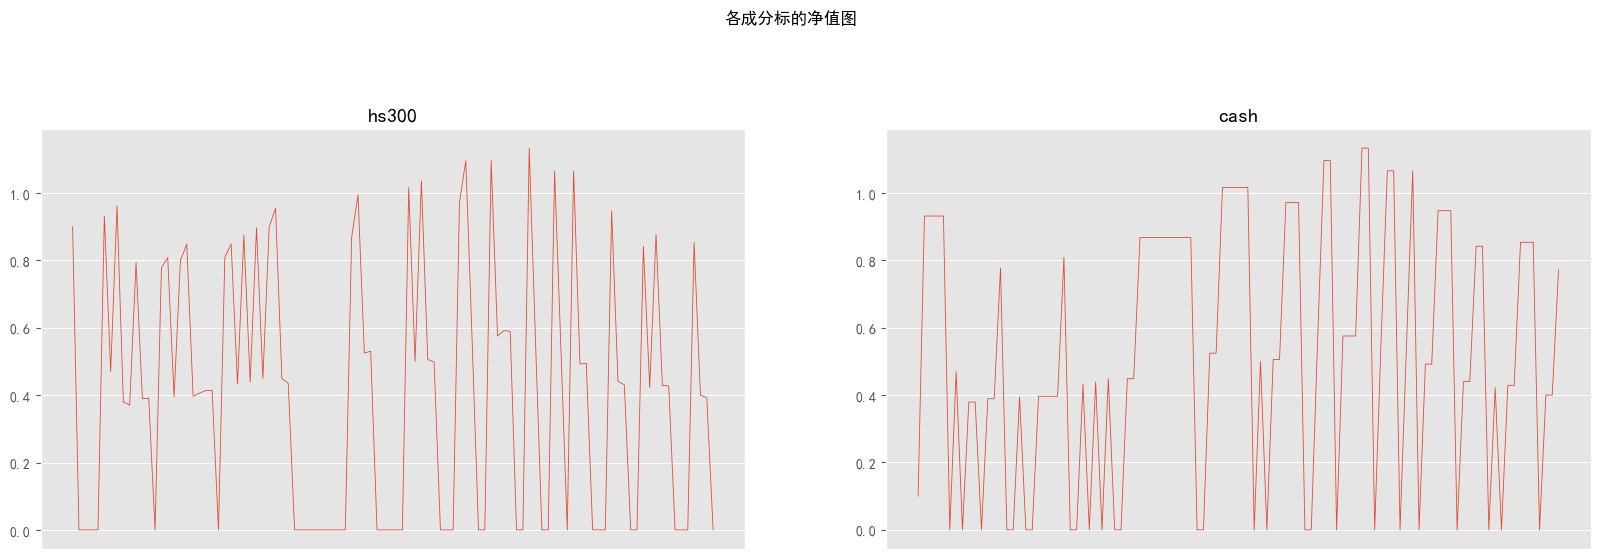

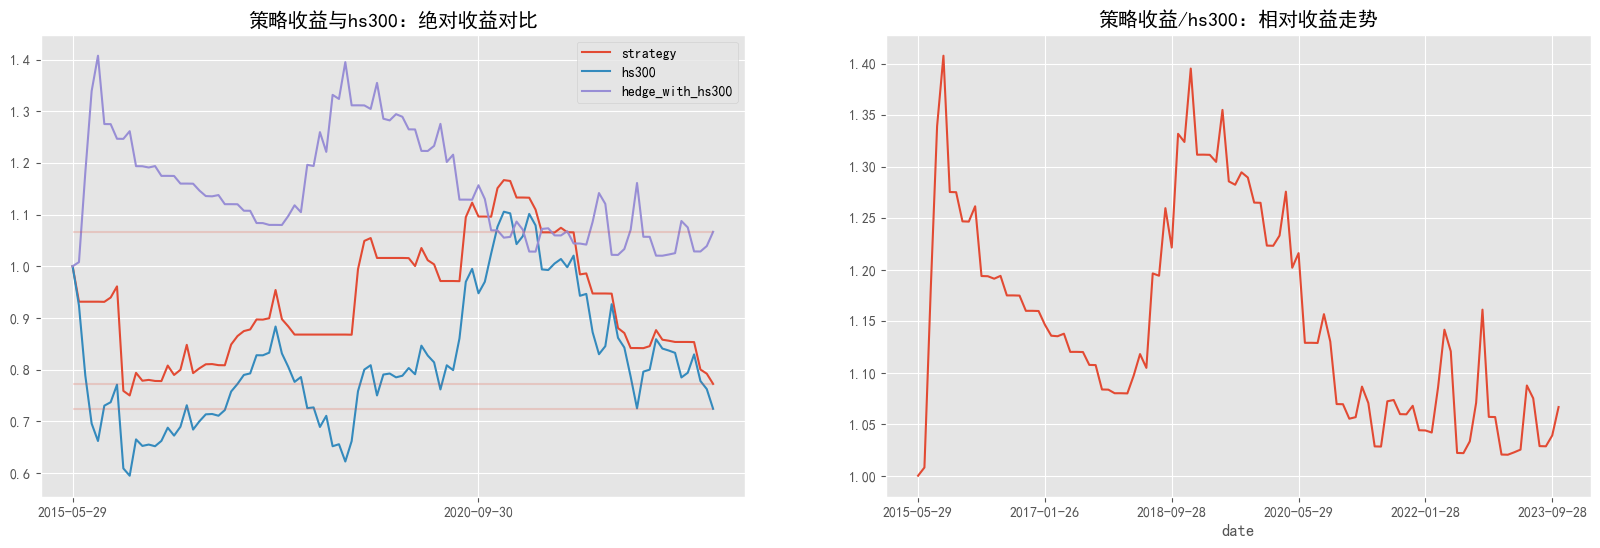

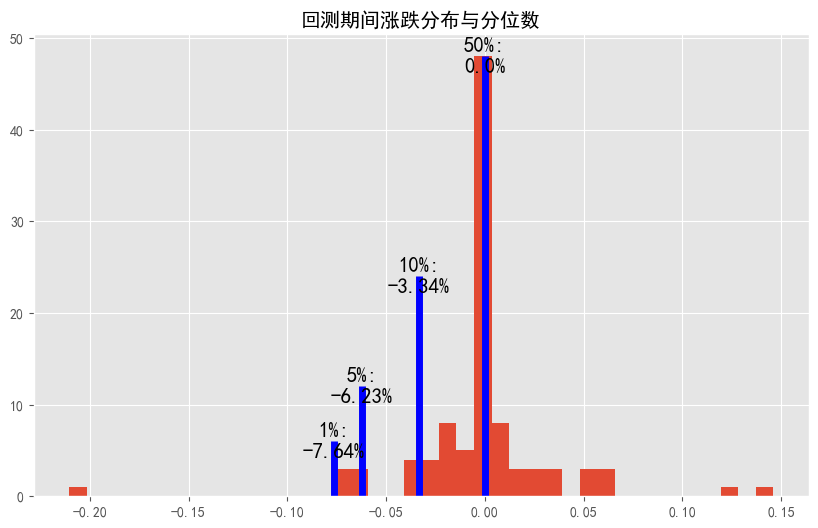

近5日组合净值：
date
2023-06-30    0.853411
2023-07-31    0.853154
2023-08-31    0.800027
2023-09-28    0.791975
2023-10-25    0.772194
dtype: object
近5日组合涨跌：
date
2023-06-30    0.000000
2023-07-31   -0.000300
2023-08-31   -0.062272
2023-09-28   -0.010064
2023-10-25   -0.024977
dtype: float64
今日持仓比例与涨跌幅：
        仓位      今日涨幅
cash   1.0  0.000000
hs300  0.0 -0.050158


In [231]:
test.run(operation_pct_in=1,operation_pct_out=.5,operation_pct_clr=1,period=2,)
test.visualization(control_group='hs300')

## 3.2：对强势资产：降低波动同时对收益影响不大：比亚迪

In [13]:
test_pool = ['']
test = cv_strategy.cv_strategy(test_pool)
test.get_close(date_start='2013-01-01',ktype_='M')
test.run(operation_pct_in=1,operation_pct_out=.5,operation_pct_clr=1,period=2)

2023-08-03-11:16:11
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
2013-03-29
卖——割肉： hs300
2013-04-26
无操作: hs300
2013-05-31
买——追涨： hs300
2013-06-28
卖——逃顶： hs300
2013-07-31
无操作: hs300
2013-08-30
买——追涨： hs300
2013-09-30
卖——逃顶： hs300
2013-10-31
无操作: hs300
2013-11-29
买——追涨： hs300
2013-12-31
卖——逃顶： hs300
2014-01-30
无操作: hs300
2014-02-28
无操作: hs300
2014-03-31
卖——割肉： hs300
2014-04-30
无操作: hs300
2014-05-30
无操作: hs300
2014-06-30
买——追涨： hs300
2014-07-31
无操作: hs300
2014-08-29
卖——逃顶： hs300
2014-09-30
买——追涨： hs300
2014-10-31
卖——逃顶： hs300
2014-11-28
买——追涨： hs300
2014-12-31
无操作: hs300
2015-01-30
卖——逃顶： hs300
2015-02-27
买——追涨： hs300
2015-03-31
无操作: hs300
2015-04-30
无操作: hs300
2015-05-29
卖——逃顶： hs300
2015-06-30
卖——割肉： hs300
2015-07-31
无操作: hs300
2015-08-31
无操作: hs300
2015-09-30
无操作: hs300
2015-10-30
买——追涨： hs300
2015-11-30
卖——逃顶： hs300
2015-12-31
买——追涨： hs300
2016-01-29
卖——逃顶： hs300
2016-02-29
无操作: hs300
2016-03-31
买——追涨： hs300
2016-04-29
卖——逃顶： 

本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2


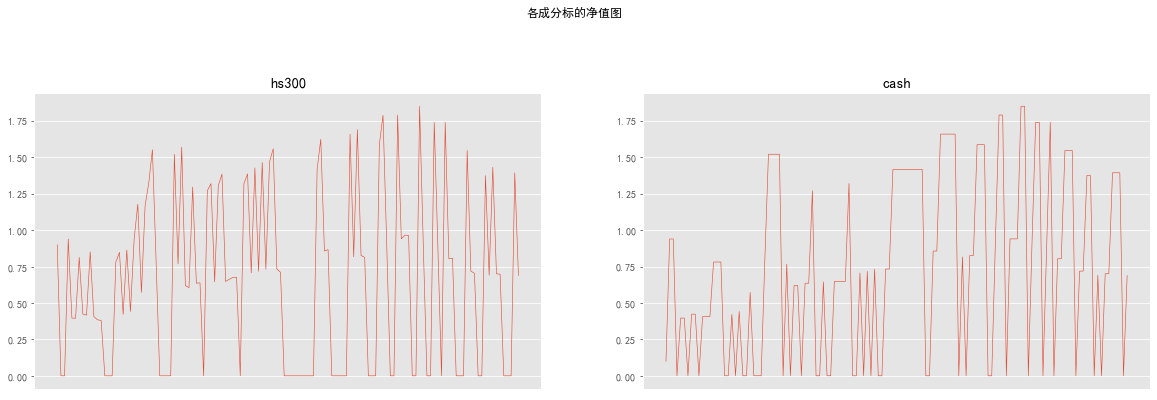

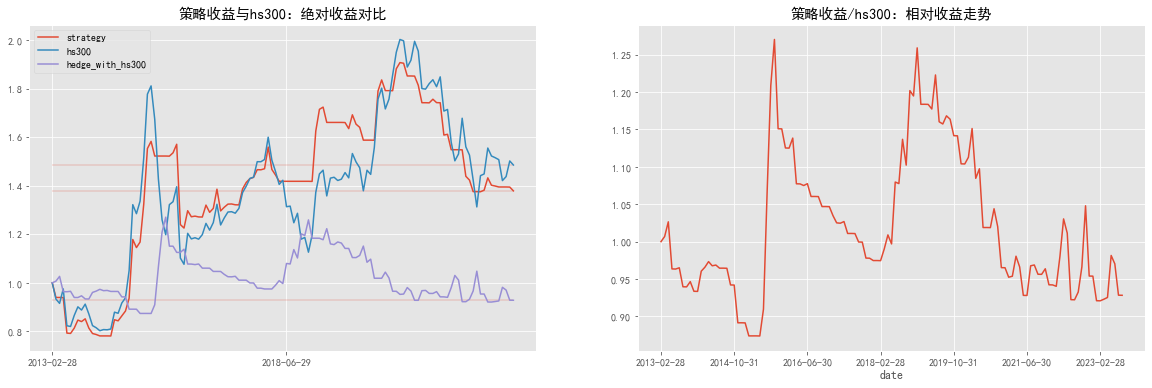

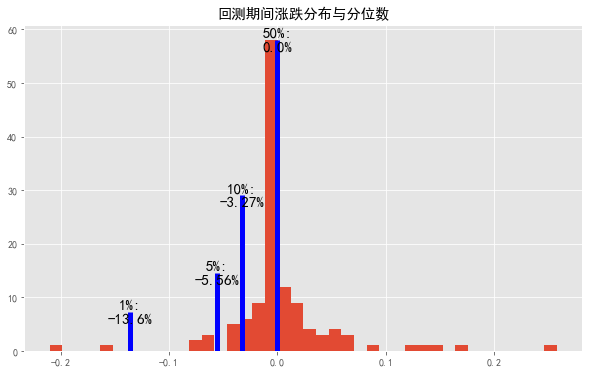

近5日组合净值：
date
2023-04-28    1.394656
2023-05-31    1.394656
2023-06-30    1.394656
2023-07-31    1.394238
2023-08-02    1.378492
dtype: object
近5日组合涨跌：
date
2023-04-28   -0.002839
2023-05-31    0.000000
2023-06-30    0.000000
2023-07-31   -0.000300
2023-08-02   -0.011293
dtype: float64
今日持仓比例与涨跌幅：
             仓位      今日涨幅
hs300  0.500227 -0.011142
cash   0.499773  0.000000


In [14]:
test.visualization(control_group='hs300')

## 3.3：对弱势资产：有限参与，保证安全：恒瑞医药

In [113]:
test_pool = ['600276']
test = cv_strategy.cv_strategy(test_pool)
test.get_close(ktype_='D',date_start='2020-06-30',date_end='2023-11-01')
test.run(operation_pct_in=1,operation_pct_out=.5,operation_pct_clr=1,period=50)

2023-09-21-17:24:40
本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2


C:\Users\Lenovo\anaconda3\Lib\site-packages\tushare\stock\trading.py:706: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(_get_k_data(url, dataflag,
C:\Users\Lenovo\anaconda3\Lib\site-packages\tushare\stock\trading.py:706: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(_get_k_data(url, dataflag,
C:\Users\Lenovo\anaconda3\Lib\site-packages\tushare\stock\trading.py:706: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(_get_k_data(url, dataflag,


本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2


C:\Users\Lenovo\anaconda3\Lib\site-packages\tushare\stock\trading.py:706: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(_get_k_data(url, dataflag,


2020-09-08
无操作: 600276
2020-09-09
卖——割肉： 600276
2020-09-10
无操作: 600276
2020-09-11
无操作: 600276
2020-09-14
无操作: 600276
2020-09-15
无操作: 600276
2020-09-16
无操作: 600276
2020-09-17
无操作: 600276
2020-09-18
无操作: 600276
2020-09-21
无操作: 600276
2020-09-22
无操作: 600276
2020-09-23
无操作: 600276
2020-09-24
无操作: 600276
2020-09-25
无操作: 600276
2020-09-28
无操作: 600276
2020-09-29
无操作: 600276
2020-09-30
无操作: 600276
2020-10-09
无操作: 600276
2020-10-12
无操作: 600276
2020-10-13
无操作: 600276
2020-10-14
无操作: 600276
2020-10-15
无操作: 600276
2020-10-16
无操作: 600276
2020-10-19
无操作: 600276
2020-10-20
无操作: 600276
2020-10-21
无操作: 600276
2020-10-22
无操作: 600276
2020-10-23
无操作: 600276
2020-10-26
无操作: 600276
2020-10-27
无操作: 600276
2020-10-28
无操作: 600276
2020-10-29
无操作: 600276
2020-10-30
无操作: 600276
2020-11-02
无操作: 600276
2020-11-03
无操作: 600276
2020-11-04
无操作: 600276
2020-11-05
无操作: 600276
2020-11-06
无操作: 600276
2020-11-09
无操作: 600276
2020-11-10
无操作: 600276
2020-11-11
无操作: 600276
2020-11-12
无操作: 600276
2020-11-13
无操作: 600276
2020-11-1

本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2


C:\Users\Lenovo\anaconda3\Lib\site-packages\tushare\stock\trading.py:706: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(_get_k_data(url, dataflag,
C:\Users\Lenovo\anaconda3\Lib\site-packages\tushare\stock\trading.py:706: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(_get_k_data(url, dataflag,


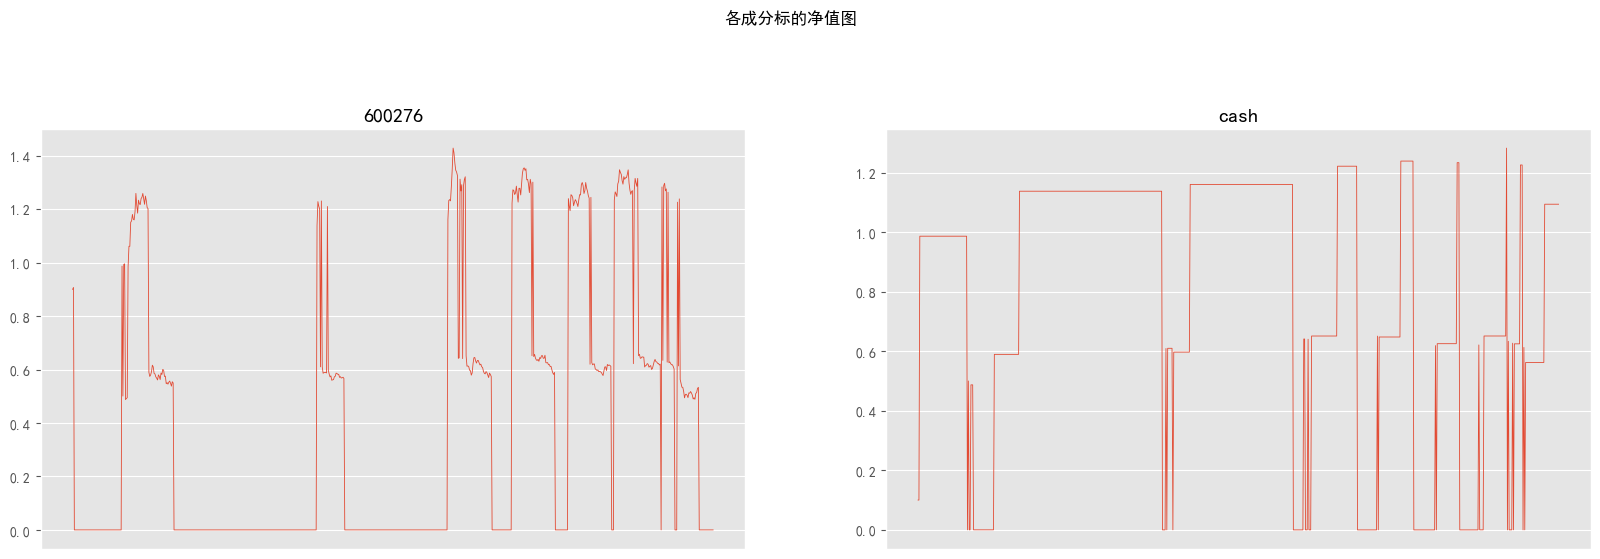

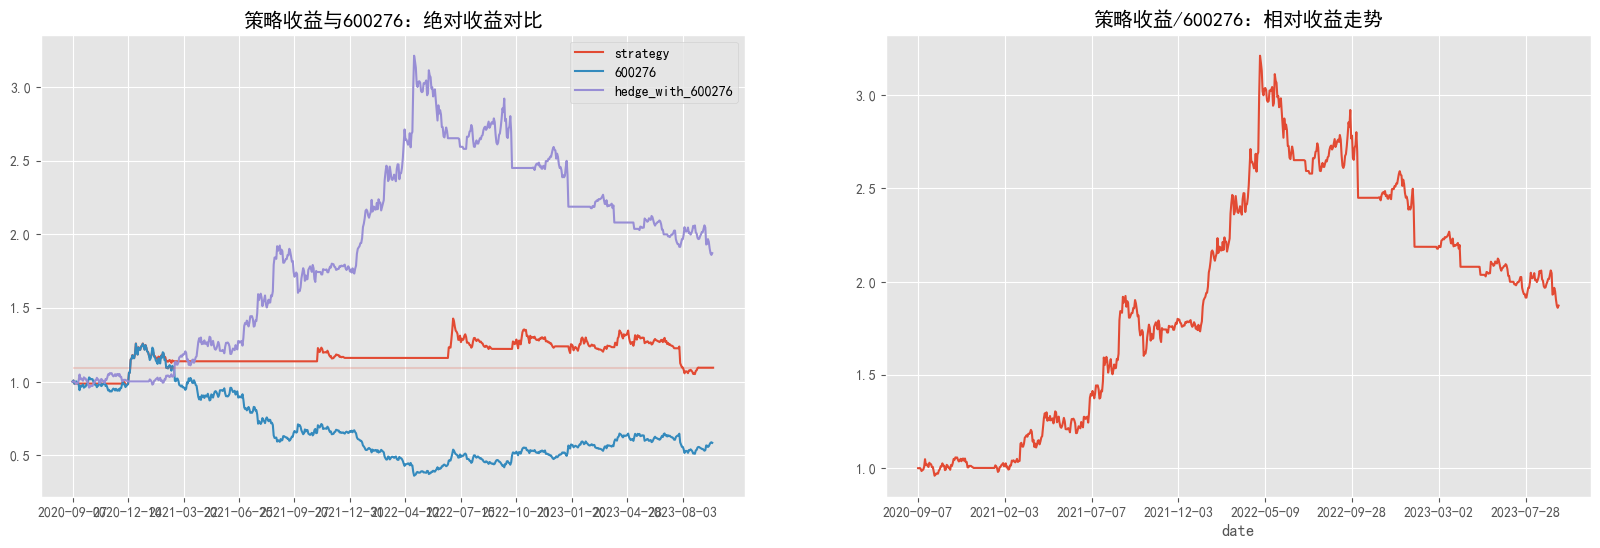

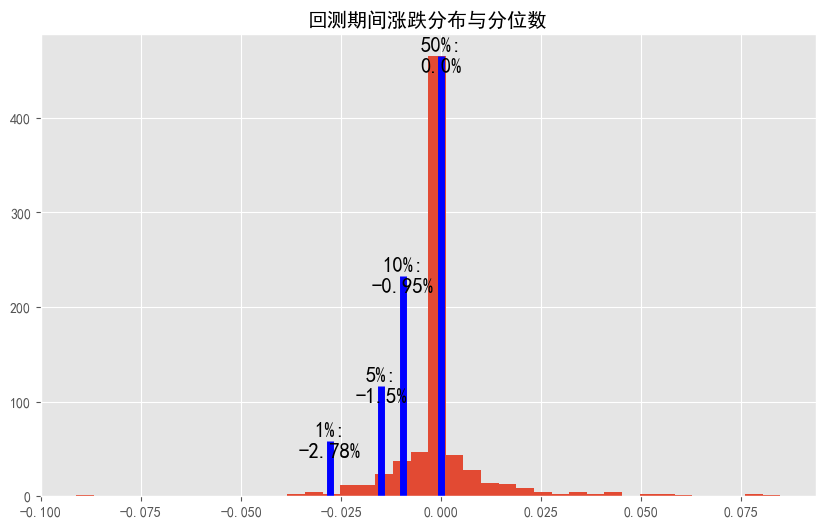

近5日组合净值：
date
2023-09-15    1.094382
2023-09-18    1.094382
2023-09-19    1.094382
2023-09-20    1.094382
2023-09-21    1.094382
dtype: object
近5日组合涨跌：
date
2023-09-15    0.0
2023-09-18    0.0
2023-09-19    0.0
2023-09-20    0.0
2023-09-21    0.0
dtype: float64
今日持仓比例与涨跌幅：
         仓位  今日涨幅
cash    1.0   0.0
600276  0.0   0.0


In [114]:
test.visualization(control_group='600276')

# 4，总结

基于变异系数的策略cv_strategy通过判断一个周期内的波动变化$\frac{dcv}{dt}$结合最新资产价格与过去一段时间的均值的大小关系来推测未来的资产价格走势，对波动增强且价格高于均值的资产超配，对波动增加且价格低于均值的资产减配，其他情况则维持安全的持仓比例，即“半仓吃瓜”

策略对于风格变化快、难以把握的资产类型可以降低其波动幅度，从而减小该资产对整体组合的影响；

策略对于强势的资产，能同时起到降低波动幅度和争取收益的效果；

策略对于弱势的资产，能起到控制最大回撤，减少参与、避免踩雷的效果。

当股票池足够丰富，策略的胜率也会随之提升。

In [6]:
# ETF持仓
pool_1=['512660','512800',# 军工、银行
        '513330','515220',# 恒生科技、煤炭
        '159996','512010',# 家电、医药
        '159825','159865',# 农业、养殖
        '159732','159995',# 消费电子、芯片
        '518880','501018',# 黄金、原油
        '159766','512690',# 旅游，酒
        '515700','515790',# 新能车、光伏
        '159985',#'511260',# 豆粕期货，十年国债ETF
        '159941', '513030',#'513080',#'513880',#,         # nasdaq,德国，法国cac40，日本225 
        '512980','512720',         # 传媒, 计算机
        '513360','159611',                  # 教育,电力
#        '515880',          # 通讯  
#       '563000','510300','510500',# 中国A50，hs300, zz500
       ]
am = cv_strategy.cv_strategy(pool_1)
am.get_close(ktype_='M',)
# 价格修正：由于tushare读取的ETF数据未进行复权，因此需要手动对数据进行复权。

# 纳指etf复权
am.close.loc[:'2022-07-05','159941'][:-1] = am.close.loc[:'2022-07-05','159941'][:-1]/4
# 酒etf复权
am.close.loc[:'2021-05-17','512690'][:-1] = am.close.loc[:'2021-05-17','512690'][:-1]/2
am.close.loc[:'2021-12-31','512690'][:-1] = am.close.loc[:'2021-12-31','512690'][:-1]-0.35
# 医药etf复权
am.close.loc[:'2021-06-28','512010'][:-1] = am.close.loc[:'2021-06-28','512010'][:-1]/4
# 煤炭etf复权
am.close.loc[:'2021-12-27','515220'][:-1] = am.close.loc[:'2021-12-27','515220'][:-1]-0.8
am.close.loc[:'2022-12-27','515220'][:-1] = am.close.loc[:'2022-12-27','515220'][:-1]-0.4
# 计算机etf分红
am.close.loc[:'2023-09-25','512720'][:-1] = am.close.loc[:'2023-09-25','512720'][:-1]-0.48

am.close.loc['2023-03-31','513030'] = 1.157

am.run(operation_pct_in=4/len(am.stock_pool),
      operation_pct_out=0.5,
      operation_pct_clr=1,
      period=2)

a = cv_strategy.cv_strategy(pool_1)
a.get_close(ktype_='D',)
# 纳指etf复权
a.close.loc[:'2022-07-05','159941'][:-1] = a.close.loc[:'2022-07-05','159941'][:-1]/4
# 酒etf复权
a.close.loc[:'2021-05-17','512690'][:-1] = a.close.loc[:'2021-05-17','512690'][:-1]/2
a.close.loc[:'2021-12-31','512690'][:-1] = a.close.loc[:'2021-12-31','512690'][:-1]-0.35
# 医药etf复权
a.close.loc[:'2021-06-28','512010'][:-1] = a.close.loc[:'2021-06-28','512010'][:-1]/4
# 煤炭etf复权
a.close.loc[:'2021-12-27','515220'][:-1] = a.close.loc[:'2021-12-27','515220'][:-1]-0.8
a.close.loc[:'2022-12-27','515220'][:-1] = a.close.loc[:'2022-12-27','515220'][:-1]-0.4
# 计算机etf分红
a.close.loc[:'2023-09-25','512720'][:-1] = a.close.loc[:'2023-09-25','512720'][:-1]-0.48
a.close.loc['2023-03-31','513030'] = 1.157


a.run()

2023-11-15-09:55:29
本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2


C:\Users\Lenovo\anaconda3\Lib\site-packages\tushare\stock\trading.py:706: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(_get_k_data(url, dataflag,


本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2


C:\Users\Lenovo\anaconda3\Lib\site-packages\tushare\stock\trading.py:706: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(_get_k_data(url, dataflag,


本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2


C:\Users\Lenovo\anaconda3\Lib\site-packages\tushare\stock\trading.py:706: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(_get_k_data(url, dataflag,


本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2


C:\Users\Lenovo\anaconda3\Lib\site-packages\tushare\stock\trading.py:706: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(_get_k_data(url, dataflag,


本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2


C:\Users\Lenovo\anaconda3\Lib\site-packages\tushare\stock\trading.py:706: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(_get_k_data(url, dataflag,


本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2


C:\Users\Lenovo\anaconda3\Lib\site-packages\tushare\stock\trading.py:706: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(_get_k_data(url, dataflag,


本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2


C:\Users\Lenovo\anaconda3\Lib\site-packages\tushare\stock\trading.py:706: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(_get_k_data(url, dataflag,


本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2


C:\Users\Lenovo\anaconda3\Lib\site-packages\tushare\stock\trading.py:706: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(_get_k_data(url, dataflag,


本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2


C:\Users\Lenovo\anaconda3\Lib\site-packages\tushare\stock\trading.py:706: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(_get_k_data(url, dataflag,


本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2


C:\Users\Lenovo\anaconda3\Lib\site-packages\tushare\stock\trading.py:706: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(_get_k_data(url, dataflag,


本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2


C:\Users\Lenovo\anaconda3\Lib\site-packages\tushare\stock\trading.py:706: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(_get_k_data(url, dataflag,


本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2


C:\Users\Lenovo\anaconda3\Lib\site-packages\tushare\stock\trading.py:706: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(_get_k_data(url, dataflag,


本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2


C:\Users\Lenovo\anaconda3\Lib\site-packages\tushare\stock\trading.py:706: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(_get_k_data(url, dataflag,


本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2


C:\Users\Lenovo\anaconda3\Lib\site-packages\tushare\stock\trading.py:706: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(_get_k_data(url, dataflag,


本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2


C:\Users\Lenovo\anaconda3\Lib\site-packages\tushare\stock\trading.py:706: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(_get_k_data(url, dataflag,


本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2


C:\Users\Lenovo\anaconda3\Lib\site-packages\tushare\stock\trading.py:706: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(_get_k_data(url, dataflag,


本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2


C:\Users\Lenovo\anaconda3\Lib\site-packages\tushare\stock\trading.py:706: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(_get_k_data(url, dataflag,


本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2


C:\Users\Lenovo\anaconda3\Lib\site-packages\tushare\stock\trading.py:706: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(_get_k_data(url, dataflag,


本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2


C:\Users\Lenovo\anaconda3\Lib\site-packages\tushare\stock\trading.py:706: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(_get_k_data(url, dataflag,


本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2


C:\Users\Lenovo\anaconda3\Lib\site-packages\tushare\stock\trading.py:706: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(_get_k_data(url, dataflag,


本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2


C:\Users\Lenovo\anaconda3\Lib\site-packages\tushare\stock\trading.py:706: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(_get_k_data(url, dataflag,


本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2


C:\Users\Lenovo\anaconda3\Lib\site-packages\tushare\stock\trading.py:706: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(_get_k_data(url, dataflag,


本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2


C:\Users\Lenovo\anaconda3\Lib\site-packages\tushare\stock\trading.py:706: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(_get_k_data(url, dataflag,


本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2


C:\Users\Lenovo\anaconda3\Lib\site-packages\tushare\stock\trading.py:706: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(_get_k_data(url, dataflag,


2022-03-31
卖——割肉： 512720
卖——割肉： 513330
卖——割肉： 515790
卖——割肉： 513360
卖——割肉： 512980
无操作: 515220
卖——割肉： 512690
卖——割肉： 515700
买——追涨： 159941
卖——割肉： 159766
无操作: 501018
卖——割肉： 159995
卖——割肉： 512660
无操作: 159985
无操作: 159825
无操作: 513030
卖——割肉： 159732
卖——割肉： 159996
买——追涨： 159865
无操作: 512010
卖——割肉： 512800
卖——割肉： 159611
无操作: 518880
2022-04-29
无操作: 512720
无操作: 513330
无操作: 515790
无操作: 513360
无操作: 512980
无操作: 515220
无操作: 512690
无操作: 515700
卖——逃顶： 159941
无操作: 159766
无操作: 501018
无操作: 159995
无操作: 512660
无操作: 159985
卖——割肉： 159825
卖——割肉： 513030
无操作: 159732
无操作: 159996
卖——逃顶： 159865
卖——割肉： 512010
无操作: 512800
无操作: 159611
买——追涨： 518880
2022-05-31
无操作: 512720
买——追涨： 513330
买——追涨： 515790
无操作: 513360
无操作: 512980
买——追涨： 515220
无操作: 512690
无操作: 515700
无操作: 159941
无操作: 159766
买——追涨： 501018
无操作: 159995
无操作: 512660
买——追涨： 159985
无操作: 159825
无操作: 513030
无操作: 159732
买——追涨： 159996
无操作: 159865
无操作: 512010
无操作: 512800
无操作: 159611
卖——逃顶： 518880
2022-06-30
买——追涨： 512720
无操作: 513330
无操作: 515790
买——追涨： 513360
买——追涨： 512980
卖——逃

C:\Users\Lenovo\anaconda3\Lib\site-packages\tushare\stock\trading.py:706: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(_get_k_data(url, dataflag,


本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2


C:\Users\Lenovo\anaconda3\Lib\site-packages\tushare\stock\trading.py:706: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(_get_k_data(url, dataflag,


本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2


C:\Users\Lenovo\anaconda3\Lib\site-packages\tushare\stock\trading.py:706: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(_get_k_data(url, dataflag,


本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2


C:\Users\Lenovo\anaconda3\Lib\site-packages\tushare\stock\trading.py:706: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(_get_k_data(url, dataflag,


本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2


C:\Users\Lenovo\anaconda3\Lib\site-packages\tushare\stock\trading.py:706: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(_get_k_data(url, dataflag,


本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2


C:\Users\Lenovo\anaconda3\Lib\site-packages\tushare\stock\trading.py:706: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(_get_k_data(url, dataflag,


本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2


C:\Users\Lenovo\anaconda3\Lib\site-packages\tushare\stock\trading.py:706: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(_get_k_data(url, dataflag,


本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2


C:\Users\Lenovo\anaconda3\Lib\site-packages\tushare\stock\trading.py:706: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(_get_k_data(url, dataflag,


本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2


C:\Users\Lenovo\anaconda3\Lib\site-packages\tushare\stock\trading.py:706: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(_get_k_data(url, dataflag,


本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2


C:\Users\Lenovo\anaconda3\Lib\site-packages\tushare\stock\trading.py:706: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(_get_k_data(url, dataflag,


本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2


C:\Users\Lenovo\anaconda3\Lib\site-packages\tushare\stock\trading.py:706: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(_get_k_data(url, dataflag,


本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2


C:\Users\Lenovo\anaconda3\Lib\site-packages\tushare\stock\trading.py:706: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(_get_k_data(url, dataflag,


本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2


C:\Users\Lenovo\anaconda3\Lib\site-packages\tushare\stock\trading.py:706: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(_get_k_data(url, dataflag,


本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2


C:\Users\Lenovo\anaconda3\Lib\site-packages\tushare\stock\trading.py:706: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(_get_k_data(url, dataflag,


本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2


C:\Users\Lenovo\anaconda3\Lib\site-packages\tushare\stock\trading.py:706: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(_get_k_data(url, dataflag,


本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2


C:\Users\Lenovo\anaconda3\Lib\site-packages\tushare\stock\trading.py:706: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(_get_k_data(url, dataflag,
C:\Users\Lenovo\anaconda3\Lib\site-packages\tushare\stock\trading.py:706: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(_get_k_data(url, dataflag,


本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2


C:\Users\Lenovo\anaconda3\Lib\site-packages\tushare\stock\trading.py:706: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(_get_k_data(url, dataflag,


本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2


C:\Users\Lenovo\anaconda3\Lib\site-packages\tushare\stock\trading.py:706: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(_get_k_data(url, dataflag,


本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2


C:\Users\Lenovo\anaconda3\Lib\site-packages\tushare\stock\trading.py:706: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(_get_k_data(url, dataflag,


本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2


C:\Users\Lenovo\anaconda3\Lib\site-packages\tushare\stock\trading.py:706: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(_get_k_data(url, dataflag,


本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2


C:\Users\Lenovo\anaconda3\Lib\site-packages\tushare\stock\trading.py:706: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(_get_k_data(url, dataflag,


本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2


C:\Users\Lenovo\anaconda3\Lib\site-packages\tushare\stock\trading.py:706: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(_get_k_data(url, dataflag,


本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2


C:\Users\Lenovo\anaconda3\Lib\site-packages\tushare\stock\trading.py:706: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(_get_k_data(url, dataflag,


2022-04-18
卖——割肉： 512720
卖——割肉： 513330
无操作: 515220
无操作: 512980
卖——割肉： 515790
卖——割肉： 515700
卖——割肉： 159766
无操作: 512690
卖——割肉： 159995
无操作: 513360
卖——割肉： 159732
无操作: 501018
无操作: 512010
无操作: 159941
无操作: 159985
无操作: 159865
无操作: 159996
无操作: 513030
无操作: 159825
卖——割肉： 512660
卖——割肉： 159611
卖——割肉： 512800
无操作: 518880
2022-04-19
无操作: 512720
无操作: 513330
买——追涨： 515220
无操作: 512980
无操作: 515790
无操作: 515700
无操作: 159766
无操作: 512690
无操作: 159995
无操作: 513360
无操作: 159732
无操作: 501018
无操作: 512010
无操作: 159941
无操作: 159985
无操作: 159865
无操作: 159996
无操作: 513030
无操作: 159825
无操作: 512660
无操作: 159611
无操作: 512800
无操作: 518880
2022-04-20
无操作: 512720
无操作: 513330
卖——逃顶： 515220
无操作: 512980
无操作: 515790
无操作: 515700
无操作: 159766
无操作: 512690
无操作: 159995
无操作: 513360
无操作: 159732
无操作: 501018
无操作: 512010
无操作: 159941
无操作: 159985
无操作: 159865
无操作: 159996
无操作: 513030
无操作: 159825
无操作: 512660
无操作: 159611
无操作: 512800
无操作: 518880
2022-04-21
无操作: 512720
无操作: 513330
无操作: 515220
无操作: 512980
无操作: 515790
无操作: 515700
无操作: 159766
无操作: 512690
无操作: 159

卖——逃顶： 159985
无操作: 159865
无操作: 159996
无操作: 513030
无操作: 159825
无操作: 512660
无操作: 159611
无操作: 512800
无操作: 518880
2022-08-09
无操作: 512720
无操作: 513330
无操作: 515220
无操作: 512980
无操作: 515790
无操作: 515700
无操作: 159766
无操作: 512690
无操作: 159995
无操作: 513360
无操作: 159732
无操作: 501018
无操作: 512010
无操作: 159941
无操作: 159985
无操作: 159865
无操作: 159996
无操作: 513030
无操作: 159825
买——追涨： 512660
无操作: 159611
无操作: 512800
无操作: 518880
2022-08-10
无操作: 512720
无操作: 513330
无操作: 515220
无操作: 512980
无操作: 515790
无操作: 515700
无操作: 159766
无操作: 512690
无操作: 159995
无操作: 513360
无操作: 159732
无操作: 501018
无操作: 512010
无操作: 159941
无操作: 159985
无操作: 159865
无操作: 159996
无操作: 513030
无操作: 159825
卖——逃顶： 512660
无操作: 159611
无操作: 512800
无操作: 518880
2022-08-11
无操作: 512720
无操作: 513330
无操作: 515220
无操作: 512980
无操作: 515790
无操作: 515700
无操作: 159766
无操作: 512690
买——追涨： 159995
无操作: 513360
买——追涨： 159732
无操作: 501018
无操作: 512010
无操作: 159941
无操作: 159985
无操作: 159865
无操作: 159996
无操作: 513030
无操作: 159825
无操作: 512660
无操作: 159611
无操作: 512800
无操作: 518880
2022-08-12
无操作: 51272

卖——逃顶： 501018
无操作: 512010
无操作: 159941
无操作: 159985
无操作: 159865
无操作: 159996
无操作: 513030
无操作: 159825
无操作: 512660
无操作: 159611
无操作: 512800
无操作: 518880
2022-12-15
无操作: 512720
无操作: 513330
无操作: 515220
无操作: 512980
无操作: 515790
无操作: 515700
无操作: 159766
无操作: 512690
无操作: 159995
无操作: 513360
无操作: 159732
无操作: 501018
无操作: 512010
无操作: 159941
无操作: 159985
无操作: 159865
无操作: 159996
无操作: 513030
无操作: 159825
无操作: 512660
无操作: 159611
无操作: 512800
无操作: 518880
2022-12-16
无操作: 512720
卖——逃顶： 513330
无操作: 515220
无操作: 512980
无操作: 515790
无操作: 515700
无操作: 159766
无操作: 512690
无操作: 159995
无操作: 513360
无操作: 159732
无操作: 501018
卖——逃顶： 512010
无操作: 159941
无操作: 159985
无操作: 159865
无操作: 159996
卖——逃顶： 513030
无操作: 159825
无操作: 512660
无操作: 159611
无操作: 512800
卖——逃顶： 518880
2022-12-19
无操作: 512720
买——追涨： 513330
无操作: 515220
卖——逃顶： 512980
无操作: 515790
无操作: 515700
无操作: 159766
无操作: 512690
无操作: 159995
无操作: 513360
无操作: 159732
无操作: 501018
无操作: 512010
无操作: 159941
买——追涨： 159985
无操作: 159865
无操作: 159996
无操作: 513030
无操作: 159825
无操作: 512660
无操作: 159611
卖——

2023-04-17
无操作: 512720
无操作: 513330
无操作: 515220
无操作: 512980
无操作: 515790
无操作: 515700
无操作: 159766
无操作: 512690
无操作: 159995
无操作: 513360
无操作: 159732
买——追涨： 501018
无操作: 512010
无操作: 159941
无操作: 159985
无操作: 159865
无操作: 159996
无操作: 513030
无操作: 159825
无操作: 512660
无操作: 159611
无操作: 512800
无操作: 518880
2023-04-18
无操作: 512720
无操作: 513330
无操作: 515220
无操作: 512980
无操作: 515790
无操作: 515700
无操作: 159766
无操作: 512690
无操作: 159995
无操作: 513360
无操作: 159732
无操作: 501018
无操作: 512010
无操作: 159941
无操作: 159985
无操作: 159865
无操作: 159996
无操作: 513030
无操作: 159825
无操作: 512660
无操作: 159611
买——追涨： 512800
无操作: 518880
2023-04-19
无操作: 512720
无操作: 513330
买——追涨： 515220
无操作: 512980
无操作: 515790
无操作: 515700
无操作: 159766
无操作: 512690
无操作: 159995
无操作: 513360
无操作: 159732
无操作: 501018
无操作: 512010
无操作: 159941
无操作: 159985
无操作: 159865
无操作: 159996
买——追涨： 513030
无操作: 159825
无操作: 512660
无操作: 159611
无操作: 512800
无操作: 518880
2023-04-20
无操作: 512720
无操作: 513330
卖——逃顶： 515220
无操作: 512980
无操作: 515790
无操作: 515700
卖——割肉： 159766
无操作: 512690
无操作: 159995
无操作: 513

买——追涨： 512800
无操作: 518880
2023-08-24
无操作: 512720
无操作: 513330
无操作: 515220
无操作: 512980
无操作: 515790
无操作: 515700
无操作: 159766
买——追涨： 512690
无操作: 159995
无操作: 513360
无操作: 159732
无操作: 501018
无操作: 512010
无操作: 159941
无操作: 159985
无操作: 159865
无操作: 159996
无操作: 513030
无操作: 159825
无操作: 512660
无操作: 159611
卖——逃顶： 512800
无操作: 518880
2023-08-25
无操作: 512720
无操作: 513330
卖——割肉： 515220
无操作: 512980
无操作: 515790
无操作: 515700
无操作: 159766
卖——逃顶： 512690
无操作: 159995
无操作: 513360
无操作: 159732
无操作: 501018
无操作: 512010
无操作: 159941
买——追涨： 159985
无操作: 159865
无操作: 159996
无操作: 513030
无操作: 159825
无操作: 512660
无操作: 159611
无操作: 512800
无操作: 518880
2023-08-28
无操作: 512720
无操作: 513330
买——追涨： 515220
无操作: 512980
无操作: 515790
无操作: 515700
无操作: 159766
无操作: 512690
无操作: 159995
无操作: 513360
无操作: 159732
无操作: 501018
无操作: 512010
无操作: 159941
无操作: 159985
无操作: 159865
无操作: 159996
无操作: 513030
无操作: 159825
无操作: 512660
无操作: 159611
买——追涨： 512800
卖——逃顶： 518880
2023-08-29
无操作: 512720
无操作: 513330
无操作: 515220
无操作: 512980
无操作: 515790
无操作: 515700
无操作: 159766
买—

In [7]:
startdate='2023-10-31'
dec_dailyreturn = a.returns.dropna().loc[startdate:]
df_model = a.weight.loc[am.weight.iloc[-2].name:]
df = pd.DataFrame(index = df_model.index,columns=df_model.columns)
df.iloc[0,:] = am.weight.iloc[-2][df.columns]

In [8]:
for i in range(1,len(df)):
    df.iloc[i,:] = df.iloc[i-1,:]*(1+dec_dailyreturn.iloc[i,:])[df.columns]

In [9]:
dfsum = pd.DataFrame(df.T.sum(),columns=['cv_m'])
hs300 = ts.get_k_data('hs300').set_index('date')
hs300 = hs300.loc[startdate:,'close']
dfs = pd.concat([df.T.sum(),hs300],axis=1)
dfs.columns=['cv_m','hs300']
dfs['ex'] = dfs.cv_m/dfs.hs300
dfs=dfs/dfs.iloc[0]

本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2


C:\Users\Lenovo\anaconda3\Lib\site-packages\tushare\stock\trading.py:706: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(_get_k_data(url, dataflag,


本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2


C:\Users\Lenovo\anaconda3\Lib\site-packages\tushare\stock\trading.py:706: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(_get_k_data(url, dataflag,


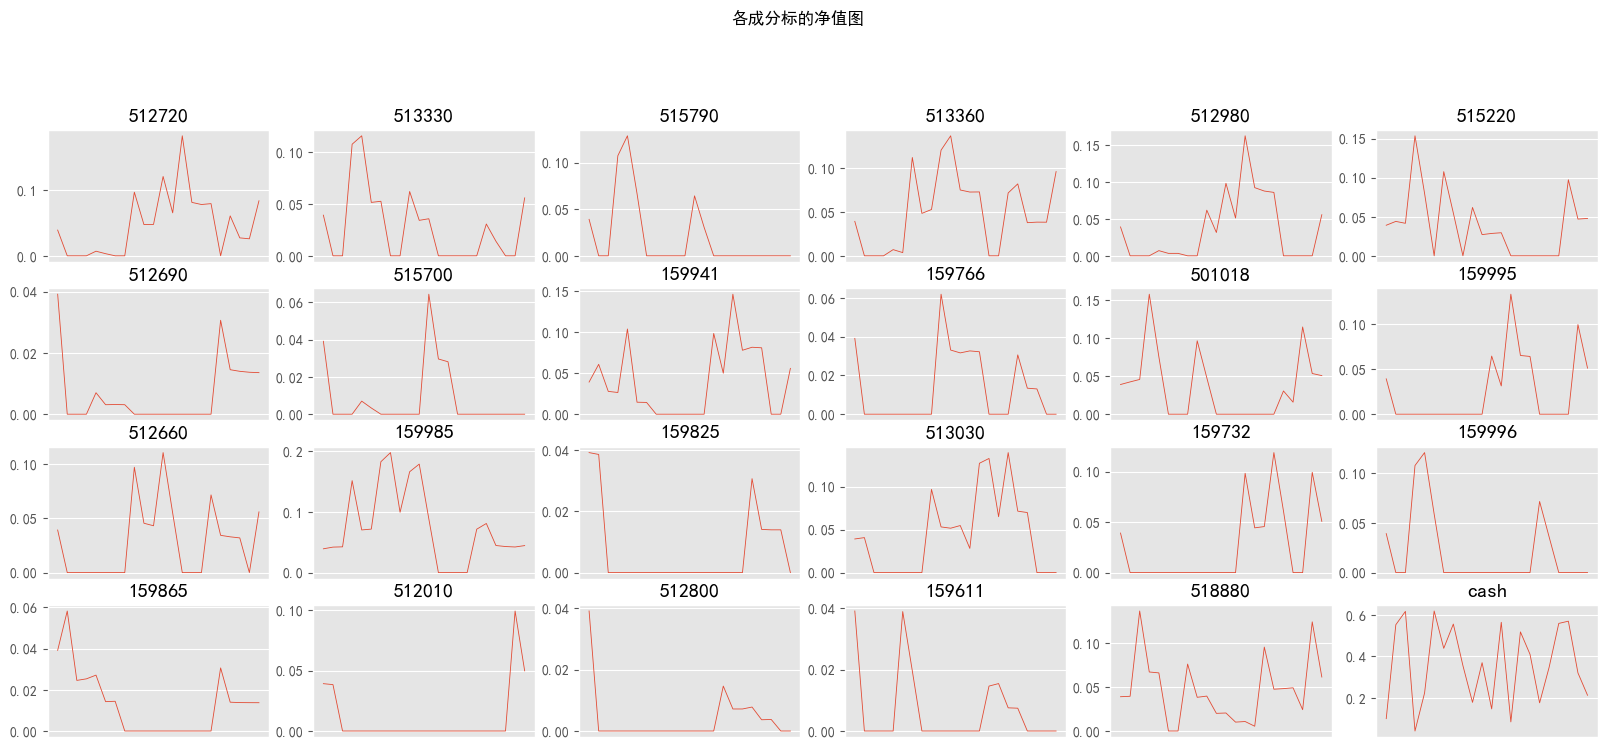

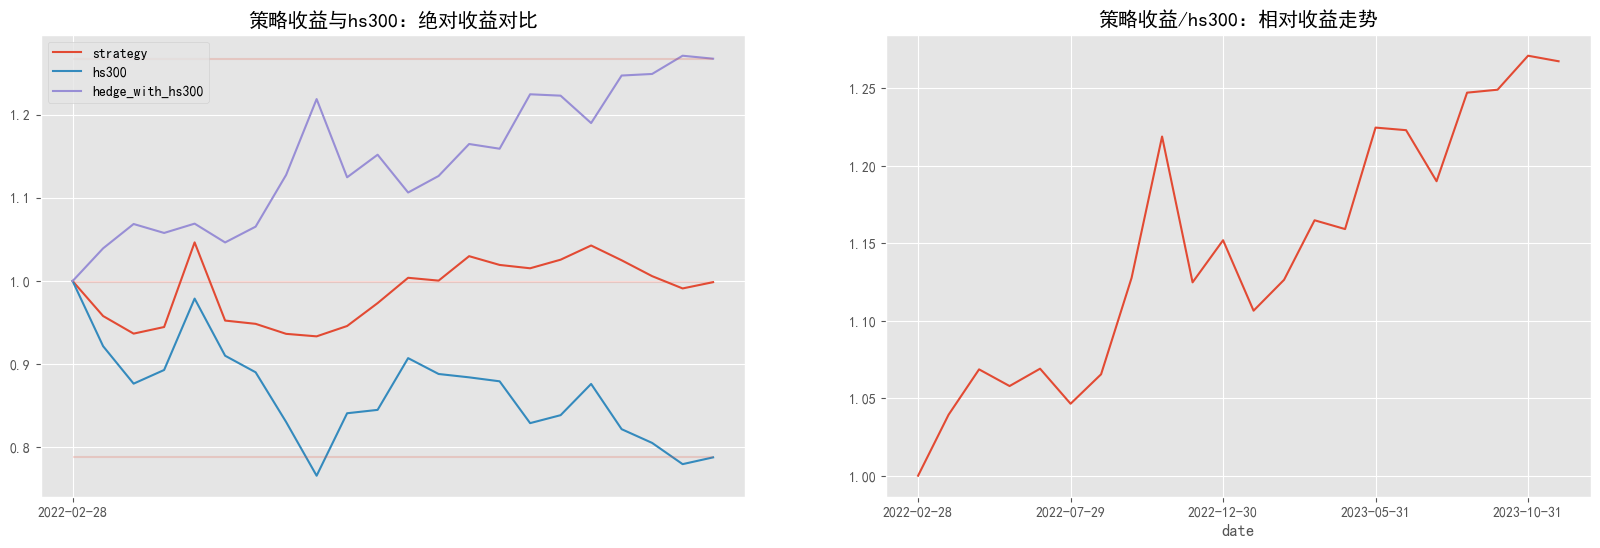

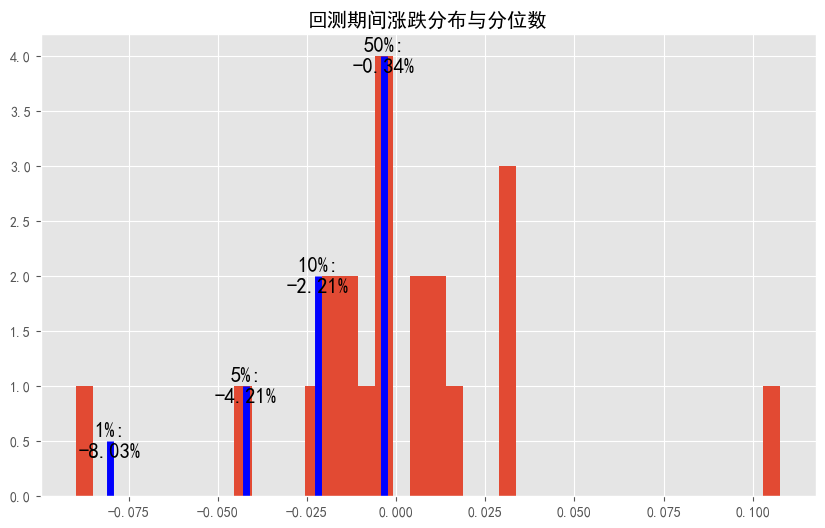

近5日组合净值：
date
2023-07-31    1.042794
2023-08-31    1.025014
2023-09-28    1.005923
2023-10-31    0.991128
2023-11-15    0.998682
dtype: object
近5日组合涨跌：
date
2023-07-31    0.016651
2023-08-31   -0.017051
2023-09-28   -0.018624
2023-10-31   -0.014709
2023-11-15    0.007622
dtype: float64
今日持仓比例与涨跌幅：
              仓位      今日涨幅
cash    0.213054  0.000000
513360  0.095811  0.045534
512720  0.083825  0.079920
518880  0.061682 -0.010823
512980  0.055848  0.087866
159941  0.055848  0.105793
512660  0.055848  0.037037
513330  0.055848  0.052910
159995  0.051071  0.028169
501018  0.050935 -0.051593
159732  0.050738  0.021459
512010  0.049785  0.002283
515220  0.047918  0.017296
159985   0.04447  0.053922
159865  0.013745 -0.001520
512690  0.013571 -0.009198
513030       0.0  0.074107
512800       0.0 -0.001848
159996       0.0  0.011121
159825       0.0 -0.004087
515700       0.0  0.024082
515790       0.0  0.036876
159766       0.0 -0.003958
159611       0.0 -0.003468


In [10]:
am.visualization(control_group='hs300')

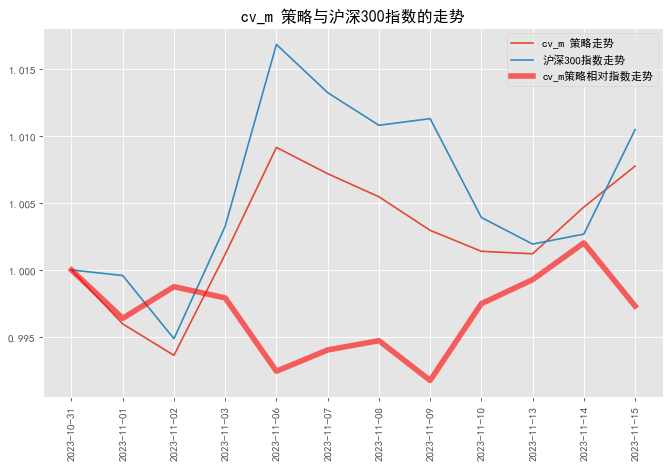

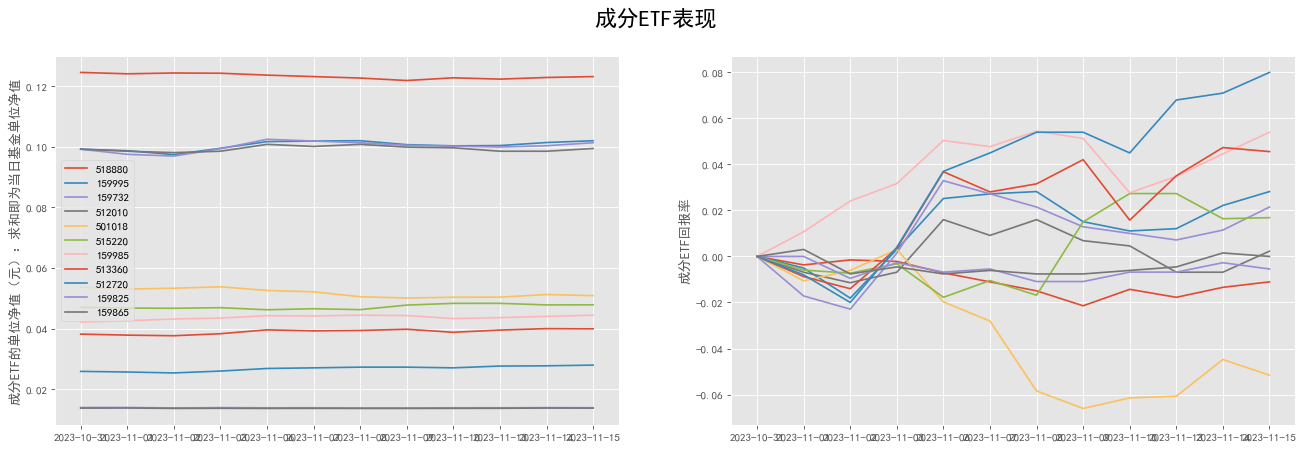

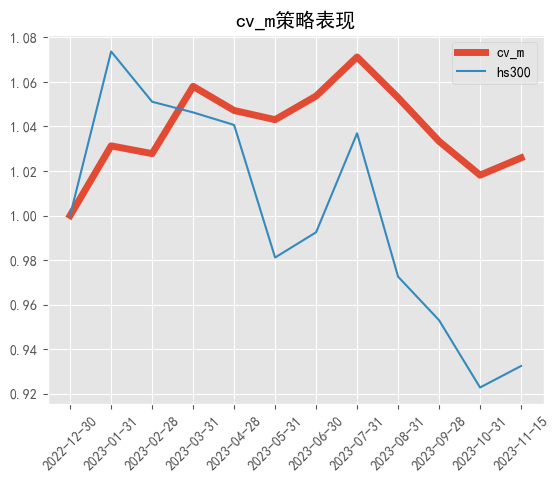

In [11]:
plt.style.use('ggplot')
plt.figure(figsize=[10,6],dpi=80)
plt.title('cv_m 策略与沪深300指数的走势')
plt.plot(dfs.cv_m,label='cv_m 策略走势')
plt.plot(dfs.hs300,label='沪深300指数走势')
plt.plot(dfs.ex,lw=5,alpha=0.6,color='red',label='cv_m策略相对指数走势')
plt.xticks(dfs.index,rotation=90)
plt.legend()
plt.show()
#——————
pt = df.T.sort_values(startdate,ascending=False).iloc[:12].T
aa = pt.columns.to_list()
aa.remove('cash')
pt=pt[aa]
fig = plt.figure(figsize=[20,6],dpi=80)
ax1 = plt.subplot(121)
ax1.set_ylabel('成分ETF的单位净值（元）：求和即为当日基金单位净值')
for i in pt.columns:
    if i != 'cash':
        ax1.plot(pt[i],label=i)
    
ax1.legend()
ax2=plt.subplot(122)
ax2.plot((pt/pt.iloc[0])-1)
ax2.set_ylabel('成分ETF回报率')

fig.suptitle('成分ETF表现',fontsize=20)
plt.show()
#----
qq = ((am.compare/(am.compare.loc['2022-12-30'])).iloc[-12:])
plt.plot(qq.strategy,label='cv_m',lw=5)
plt.plot(qq.hs300,label='hs300')
plt.title('cv_m策略表现')
plt.xticks(rotation=45)
plt.legend()

---

In [14]:
hs300_list = pd.read_excel(r'./hs300.xlsx',sheet_name=1).dropna()
hs300_list = [i[:6] for i in hs300_list['证券代码']]
hs300_pool = cv_strategy.cv_strategy(hs300_list)
hs300_pool.get_close()
area = hs300_pool.close
prd = 50
cv = area.rolling(prd).std()/area.rolling(prd).mean()
cv.dropna(inplace=True)
cv = cv.iloc[1:]
rtn = area/area.shift(prd)
rtn.dropna(inplace=True)
rtn = rtn.applymap(lambda x:np.log(x))
# fig = plt.figure(figsize=[10,10],dpi=80)
# ax1 = plt.subplot()
# # ax1.scatter(x = cv.iloc[-1],y = rtn.iloc[-1],alpha=.6,marker='o')
# # ax1.scatter(x = cv.iloc[-2],y = rtn.iloc[-2],alpha=.6,marker='o')
# for i in range(len(cv.iloc[-1])):
#     ax1.arrow(x=cv.iloc[-2,i], y=rtn.iloc[-2,i], dx = cv.iloc[-1,i]-cv.iloc[-2,i],dy = rtn.iloc[-1,i]-rtn.iloc[-2,i],
#               length_includes_head=True,width=0.0005,head_width=0.003)
# plt.scatter(x2,np.log(y2),alpha=0.2)
dcv = cv-cv.shift(1)
dcv.dropna(inplace=True)
# dcv = dcv.iloc[1:]
drtn=rtn-rtn.shift(1)
drtn.dropna(inplace=True)
vel = pd.DataFrame(columns=dcv.columns,index=dcv.index)
for i in range(len(dcv.columns)):
    for j in range(len(dcv.index)):
        if dcv.iloc[j,i]>0 and drtn.iloc[j,i]>0:
            vel.iloc[j,i] = 1
        elif dcv.iloc[j,i]<0 and drtn.iloc[j,i]>0:
            vel.iloc[j,i] = 2
        elif dcv.iloc[j,i]<0 and drtn.iloc[j,i]<0:
            vel.iloc[j,i] = 3
        elif dcv.iloc[j,i]>0 and drtn.iloc[j,i]<0:
            vel.iloc[j,i] = 4


# aset = cv.iloc[-1][cv.iloc[-1]>0].index.to_list()
# bset = rtn.iloc[-1][rtn.iloc[-1]>0].index.to_list()
# area_1 = [i for i in aset if i in bset]
# x = cv.iloc[-1][area_1]
# y = rtn.iloc[-1][area_1]
# plt.scatter(x=x,y=y)
fig=plt.figure(figsize=[10,10],dpi=100)
fig.suptitle('沪深300成分股鱼群图')
colors = ['red','orange','orange','green']
for j in range(1,5):
    a1 = (vel.iloc[-1][vel.iloc[-1]==j]).index
    a1x=cv[a1].iloc[-2]
    a1y=rtn[a1].iloc[-2]
    a1dx=dcv[a1].iloc[-1]
    a1dy=drtn[a1].iloc[-1]
    for i in range(len(a1)):
        ax=plt.subplot(2,2,j)
        ax.set_xlim(0,.2)
        ax.set_ylim(-.5,.5)
        ax.arrow(x=a1x[i],y=a1y[i],dx=a1dx[i],dy=a1dy[i],width=0.0005,head_width=0.005,color=colors[j-1])
        ax.set_title('向第{}象限移动:{}只'.format(j,len(a1)))

2023-08-11-10:35:47
本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2


C:\Users\Lenovo\anaconda3\Lib\site-packages\tushare\stock\trading.py:706: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(_get_k_data(url, dataflag,


本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2


C:\Users\Lenovo\anaconda3\Lib\site-packages\tushare\stock\trading.py:706: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(_get_k_data(url, dataflag,


本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2


C:\Users\Lenovo\anaconda3\Lib\site-packages\tushare\stock\trading.py:706: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(_get_k_data(url, dataflag,


本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2


C:\Users\Lenovo\anaconda3\Lib\site-packages\tushare\stock\trading.py:706: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(_get_k_data(url, dataflag,


本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2


C:\Users\Lenovo\anaconda3\Lib\site-packages\tushare\stock\trading.py:706: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(_get_k_data(url, dataflag,


本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2


C:\Users\Lenovo\anaconda3\Lib\site-packages\tushare\stock\trading.py:706: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(_get_k_data(url, dataflag,


本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2


C:\Users\Lenovo\anaconda3\Lib\site-packages\tushare\stock\trading.py:706: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(_get_k_data(url, dataflag,


本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2


C:\Users\Lenovo\anaconda3\Lib\site-packages\tushare\stock\trading.py:706: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(_get_k_data(url, dataflag,


本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2


KeyboardInterrupt: 

In [ ]:
frames = len(cv)
data = [(cv.iloc[i], rtn.iloc[i]) for i in range(frames)]

In [ ]:
fig = plt.figure(figsize=[8,8],dpi=80)
ax = plt.subplot()
ax.set_xlim(0,1)
ax.set_ylim(-1.5,1.5)
ax.set_xlabel('50日波动率')
ax.set_ylabel('50日回报率')
ax.hlines(xmin=0,xmax=1,y=0)
s=ax.scatter([],[],s=5,)
t = ax.text(0,-1,'')
ax.set_title('沪深300成分股波动率与收益率散点动图')
def anima(i):
    s.set_offsets(np.array([data[i][0], data[i][1]]).T)
    t.set_text(data[i][0].name)
ani=animation.FuncAnimation(fig,anima,frames=frames,interval=200)
ani.save('bb.gif')

In [300]:
aa = ts.get_k_data('513330').set_index('date')
aa

本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2


,open,close,high,low,volume,code
date,,,,,,
2021-02-08,1.006,1.001,1.012,0.993,8808050.0,513330
2021-02-09,1.005,1.008,1.014,0.999,6368694.0,513330
2021-02-10,1.020,1.044,1.045,1.020,8463041.0,513330
2021-02-18,1.100,1.069,1.109,1.066,13076993.0,513330
2021-02-19,1.069,1.064,1.069,1.037,6962408.0,513330
...,...,...,...,...,...,...
2023-02-24,0.449,0.443,0.449,0.440,47696083.0,513330
2023-02-27,0.436,0.435,0.445,0.434,61892203.0,513330
2023-02-28,0.439,0.431,0.441,0.428,59794325.0,513330


<AxesSubplot:>

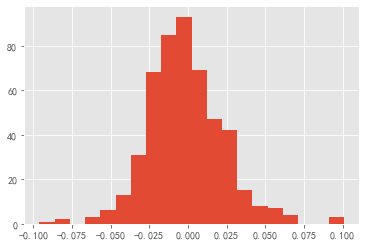

In [303]:
aa['returns'] = aa.close.pct_change()
aa.returns.hist(bins=20)

本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2


In [30]:
df = ts.get_k_data('hs300',start='2000-01-01').set_index('date')

本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2


C:\Users\Lenovo\anaconda3\Lib\site-packages\tushare\stock\trading.py:706: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(_get_k_data(url, dataflag,
C:\Users\Lenovo\anaconda3\Lib\site-packages\tushare\stock\trading.py:706: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(_get_k_data(url, dataflag,
C:\Users\Lenovo\anaconda3\Lib\site-packages\tushare\stock\trading.py:706: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(_get_k_data(url, dataflag,
C:\Users\Lenovo\anaconda3\Lib\site-packages\tushare\stock\trading.py:706: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(_get_k_

In [39]:
n=8
df['history_return'] = (df.close)/(df.close.shift(n))
df['future_return'] = (df.close.shift(-n))/(df.close)
# df['rocma10'] = df['history_return_240'].rolling(10).mean()
# df['d_rocma'] = df['rocma10'] - df['rocma10'].shift(1)
df

,open,close,high,low,volume,code,history_return,future_return
date,,,,,,,,
2005-04-08,984.66,1003.45,1003.70,979.53,14762500.0,hs300,NaN,0.947601
2005-04-11,1003.88,995.42,1008.73,992.77,15936100.0,hs300,NaN,0.948323
2005-04-12,993.71,978.70,993.71,978.20,10226200.0,hs300,NaN,0.959538
2005-04-13,987.95,1000.90,1006.50,987.95,16071700.0,hs300,NaN,0.929234
2005-04-14,1004.64,986.97,1006.42,985.58,12945700.0,hs300,NaN,0.949451
...,...,...,...,...,...,...,...,...
2023-08-16,3830.83,3818.33,3852.42,3817.63,94616946.0,hs300,0.949696,NaN
2023-08-17,3801.20,3831.10,3836.15,3782.50,98415493.0,hs300,0.960139,NaN
2023-08-18,3832.46,3784.00,3844.20,3784.00,95549638.0,hs300,0.950818,NaN


In [42]:
df[(df['history_return']<=df['history_return'][-1])]['future_return'].median()

1.0014660606949128

<Axes: >

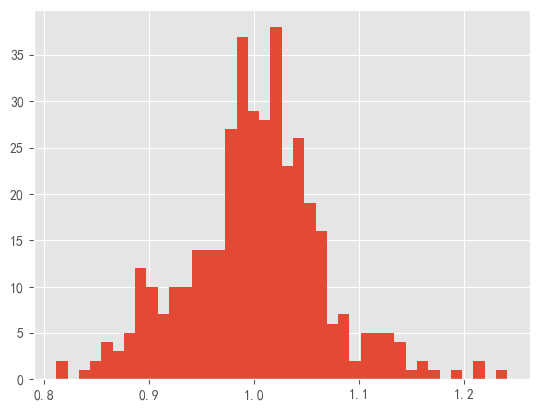

In [40]:
df[(df['history_return']<=df['history_return'][-1])]['future_return'].hist(bins=40)

In [91]:
df1 = df.iloc[-1750:]
roc = 0.93

<AxesSubplot:>

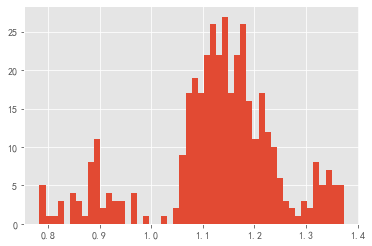

In [92]:
# df1[(df1['history_return_240']<=roc)&(df1['d_rocma']>0)]['future_return_240'].hist(bins=50)
# df1[(df1['history_return_240']<=roc)&(df1['d_rocma']<0)]['future_return_240'].hist(bins=50,alpha=0.4)
df1[(df1['history_return_240']<=roc)]['future_return_240'].hist(bins=50,alpha=1)

In [96]:
fr = df1[df1['history_return_240']<=roc]['future_return_240'].dropna()
print(np.percentile(fr,[1,5,10,20,50,80,90,95,99]))

[0.79492967 0.88099154 0.91585121 1.07685633 1.14038125 1.21244217
 1.25804753 1.33125277 1.3620961 ]


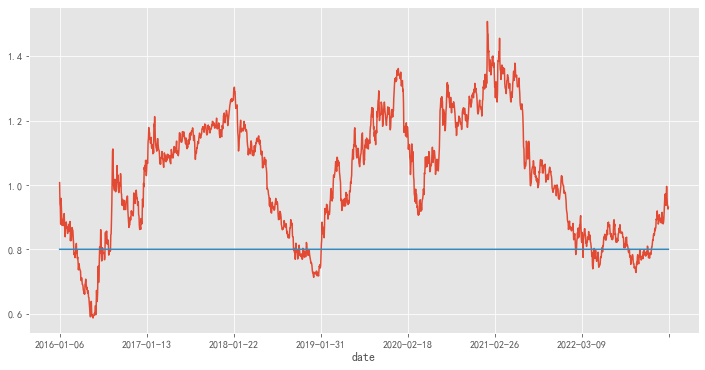

In [97]:
df1.history_return_240.plot(figsize=[12,6])
plt.plot(df1.history_return_240.index,np.ones_like(df1.history_return_240.index)*0.8)

<AxesSubplot:>

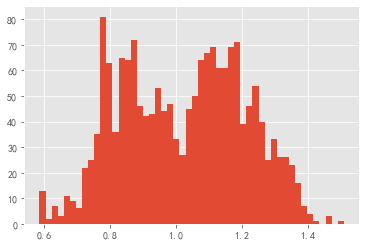

In [69]:
df1['history_return_240'].hist(bins=50)

In [ ]:
df1.close.pctchange()

In [13]:
def peak_amount(a):
    a_mid = a[1:-1]
    a_front = a[0:-2]
    a_bhind = a[2:]
    l1 = [a_mid[i] for i in range(len(a_mid)) if a_mid[i] > a_front[i] and a_mid[i] > a_bhind[i]]
    l2 = [a_mid[i] for i in range(len(a_mid)) if a_mid[i] < a_front[i] and a_mid[i] < a_bhind[i]]
    print('极大值个数：',len(l1))
    print('极小值个数：',len(l2))
    return len(l1)+len(l2)

In [15]:
peak_amount(df['history_return_240'].rolling(10).mean())

极大值个数： 297
极小值个数： 297


594

In [183]:
df_rr = pd.read_excel(r'../stocks_stories/fund_risk_return.xlsx')

In [184]:
from jwli_tools import ols_v2

In [187]:
df_rr.dropna(inplace=True)
df_rr['-1*最大回撤'] = -1*df_rr['最大回撤[起始交易日期] 本年初[截止交易日期] 最新[单位] %']

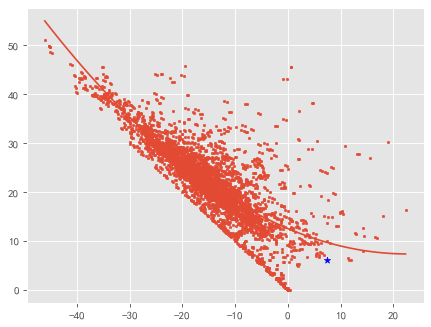

In [188]:
plt.figure(dpi=80,)
ols_v2(df_rr['今年以来回报[是否年化] 否[交易日期] 最新[单位] %'],df_rr['-1*最大回撤'],2)
plt.scatter(x = 7.43,y=6,marker='*',color='blue')

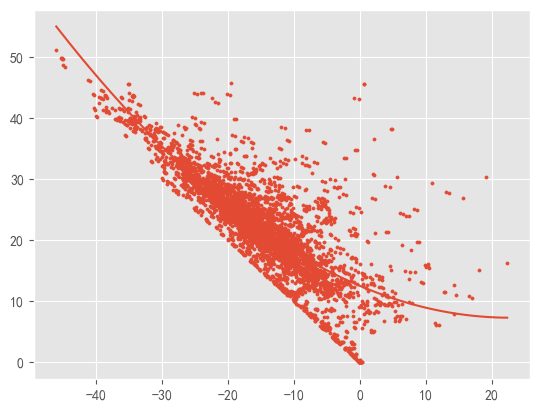

In [189]:
a,b,c = ols_v2(df_rr['今年以来回报[是否年化] 否[交易日期] 最新[单位] %'],df_rr['-1*最大回撤'],2)

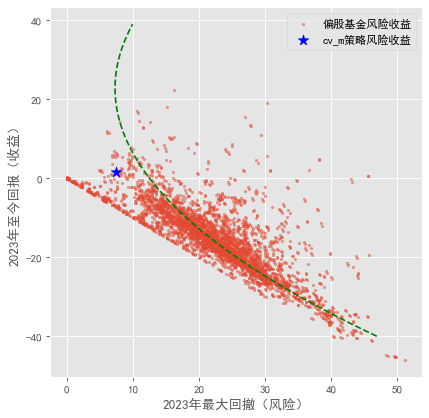

In [194]:
plt.figure(figsize=[6,6],dpi=80)

x=np.arange(-40,40)
y = a*x**2+b*x+c
plt.plot(y,x,ls='--',color='green',)


x=df_rr['-1*最大回撤']
y=df_rr['今年以来回报[是否年化] 否[交易日期] 最新[单位] %']
plt.scatter(x,y,s=5,label='偏股基金风险收益',alpha=0.5)
plt.scatter(x = 7.43,y=1.6,marker='*',color='blue',s=100,label='cv_m策略风险收益')

plt.xlabel('2023年最大回撤（风险）')
plt.ylabel('2023年至今回报（收益）')
plt.legend()

In [202]:
df_rr['风险收益比'] = df_rr['今年以来回报[是否年化] 否[交易日期] 最新[单位] %']/df_rr['-1*最大回撤']
df_rr['风险收益比'].sort_values(ascending=False)

3374    5.000000
3495    4.000000
3458    2.000000
3733    1.946027
3080    1.879040
          ...   
2734        -inf
2735        -inf
3457        -inf
3494        -inf
3308         NaN
Name: 风险收益比, Length: 4060, dtype: float64

In [203]:
df_rr[df_rr['风险收益比']>0.216]

,证券代码↑,证券简称,最大回撤[起始交易日期] 本年初[截止交易日期] 最新[单位] %,今年以来回报[是否年化] 否[交易日期] 最新[单位] %,-1*最大回撤,风险收益比
28,000522.OF,华润元大信息传媒科技A,-29.3598,10.9013,29.3598,0.371300
40,000965.OF,汇丰晋信新动力,-13.9933,3.2744,13.9933,0.233998
97,004351.OF,汇丰晋信珠三角区域,-19.2455,6.3401,19.2455,0.329433
167,005536.OF,渤海汇金量化成长,-9.4697,5.7682,9.4697,0.609122
190,005844.OF,东方人工智能主题A,-30.2940,19.0865,30.2940,0.630042
...,...,...,...,...,...,...
3759,320011.OF,诺安中小盘精选,-13.6137,7.4390,13.6137,0.546435
3761,320015.OF,诺安行业轮动A,-10.9666,14.5312,10.9666,1.325041
3811,483003.OF,工银精选平衡,-7.1478,6.9032,7.1478,0.965780
3875,519185.OF,万家精选A,-15.5052,10.4908,15.5052,0.676599


In [174]:
df_rr['var'] = df_rr['今年以来回报']/df_rr['-1*最大回撤']

KeyError: '今年以来回报'

In [51]:
tb = ak.bond_zh_us_rate()
tb.set_index('日期',inplace=True)

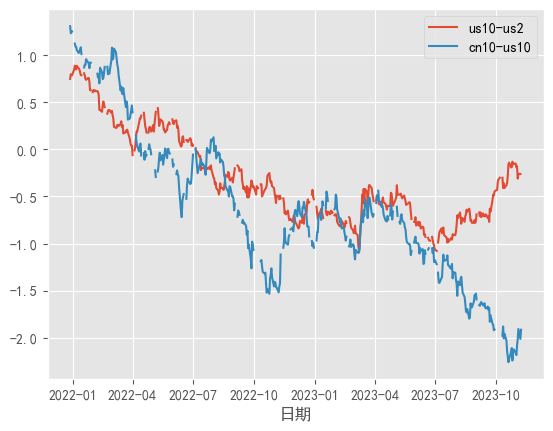

In [52]:
tb_p = tb.iloc[-500:]
tb_p['美国国债收益率10年-2年'].plot(label='us10-us2')
(tb_p['中国国债收益率10年']-tb_p['美国国债收益率10年']).plot(label='cn10-us10')
plt.legend()

In [91]:
jsj = ts.get_k_data('512690').set_index('date')
jsj

本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2


C:\Users\Lenovo\anaconda3\Lib\site-packages\tushare\stock\trading.py:706: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(_get_k_data(url, dataflag,


,open,close,high,low,volume,code
date,,,,,,
2021-02-25,2.561,2.502,2.577,2.470,1997239.0,512690
2021-02-26,2.431,2.433,2.477,2.370,2389235.0,512690
2021-03-01,2.460,2.441,2.480,2.405,1677758.0,512690
2021-03-02,2.466,2.378,2.491,2.353,1885754.0,512690
2021-03-03,2.370,2.430,2.436,2.345,1486960.0,512690
...,...,...,...,...,...,...
2023-10-12,0.772,0.768,0.775,0.764,6435895.0,512690
2023-10-13,0.762,0.751,0.763,0.747,6617259.0,512690
2023-10-16,0.750,0.741,0.750,0.737,6796034.0,512690


In [93]:
jsj.loc[:'2021-05-17','close'][:-1] = jsj.loc[:'2021-05-17','close'][:-1]/2

In [94]:
jsj.loc[:'2021-12-31','close'][:-1] = jsj.loc[:'2021-12-31','close'][:-1]-0.35


In [79]:
sw_1st_info = ak.sw_index_first_info()
sw_1st_list = [i[:6]for i in sw_1st_info['行业代码']]
sw_data = pd.DataFrame(columns=sw_1st_list)
for i in sw_1st_list:
    sw_data[i] = ak.index_hist_sw(i).set_index('日期')['收盘']
swt1 = sw_data.iloc[-4000:].T.dropna().T
sw = cv_strategy.cv_strategy(swt1.columns)
sw.close = swt1
sw.run()
sw.date_start = str(swt1.index[0])
sw.date_end = str(swt1.index[-1])
sw.ktype = 'D'
sw.visualization()

In [2]:
import dingpan_plots

本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2


C:\Users\Lenovo\anaconda3\Lib\site-packages\tushare\stock\trading.py:706: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(_get_k_data(url, dataflag,
C:\Users\Lenovo\anaconda3\Lib\site-packages\tushare\stock\trading.py:706: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(_get_k_data(url, dataflag,
C:\Users\Lenovo\anaconda3\Lib\site-packages\tushare\stock\trading.py:706: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(_get_k_data(url, dataflag,
C:\Users\Lenovo\anaconda3\Lib\site-packages\tushare\stock\trading.py:706: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(_get_k_

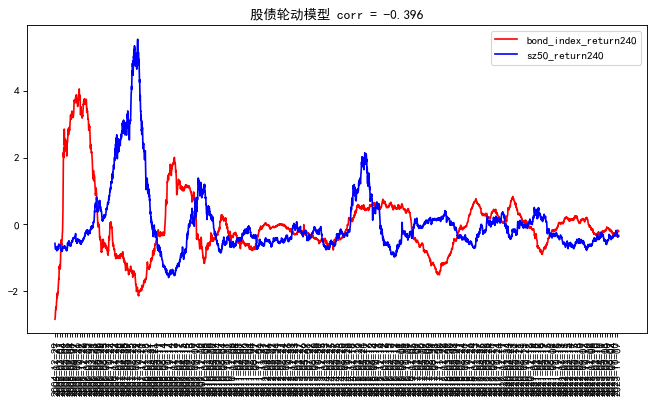

In [3]:
stock_bond = dingpan_plots.stock_bond_rolling(start_date='2001-01-04')

In [5]:
stock_bond_to1 = stock_bond/stock_bond.iloc[0]

<Axes: title={'center': 'sz50+国债，1：7'}, xlabel='date'>

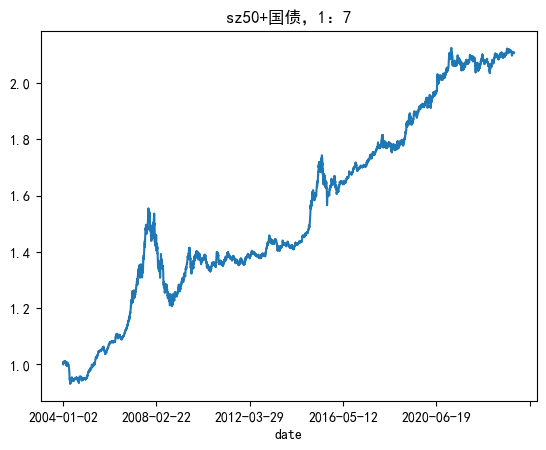

In [6]:
_28 = stock_bond_to1.sz50*0.125 + stock_bond_to1.bond_index*.875
_28.plot(title='sz50+国债，1：7')

<Axes: >

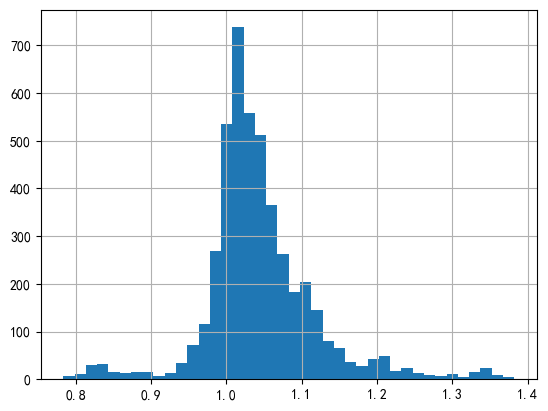

In [7]:
_28_240ret = _28/_28.shift(240)
_28_240ret.hist(bins = 40)

In [37]:
lt = ['518880','501018']
for i in lt:
    aa = ts.get_k_data(i,start='2010-01-01').set_index('date')['close']
    stock_bond[i] = aa

本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2


C:\Users\Lenovo\anaconda3\Lib\site-packages\tushare\stock\trading.py:706: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(_get_k_data(url, dataflag,
C:\Users\Lenovo\anaconda3\Lib\site-packages\tushare\stock\trading.py:706: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(_get_k_data(url, dataflag,
C:\Users\Lenovo\anaconda3\Lib\site-packages\tushare\stock\trading.py:706: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(_get_k_data(url, dataflag,
C:\Users\Lenovo\anaconda3\Lib\site-packages\tushare\stock\trading.py:706: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(_get_k_

本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2


C:\Users\Lenovo\anaconda3\Lib\site-packages\tushare\stock\trading.py:706: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(_get_k_data(url, dataflag,
C:\Users\Lenovo\anaconda3\Lib\site-packages\tushare\stock\trading.py:706: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(_get_k_data(url, dataflag,
C:\Users\Lenovo\anaconda3\Lib\site-packages\tushare\stock\trading.py:706: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(_get_k_data(url, dataflag,
C:\Users\Lenovo\anaconda3\Lib\site-packages\tushare\stock\trading.py:706: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(_get_k_

In [39]:
stock_bond.dropna(inplace=True)

In [40]:
pct = (1/(stock_bond.rolling(240).std()/stock_bond.rolling(240).mean()).median())
pct = pct/pct.sum()

In [41]:
pct

sz50          0.111597
bond_index    0.602753
518880        0.219897
501018        0.065753
dtype: float64

In [49]:
stock_bond = stock_bond/stock_bond.iloc[0]

In [50]:
ab = 0 
for i in stock_bond.columns:
    ab += stock_bond[i]*pct[i]

<Axes: xlabel='date'>

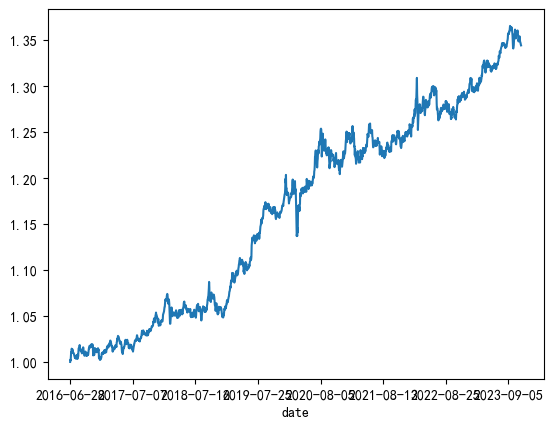

In [52]:
ab.plot()

In [57]:
1.35**(250/len(ab))

1.0425138212116607

In [8]:
gold=ts.get_k_data('518880',start='2001-01-01').set_index('date')
stock_bond_gold = stock_bond.join(gold['close']).dropna()

本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2


C:\Users\Lenovo\anaconda3\Lib\site-packages\tushare\stock\trading.py:706: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(_get_k_data(url, dataflag,
C:\Users\Lenovo\anaconda3\Lib\site-packages\tushare\stock\trading.py:706: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(_get_k_data(url, dataflag,
C:\Users\Lenovo\anaconda3\Lib\site-packages\tushare\stock\trading.py:706: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(_get_k_data(url, dataflag,
C:\Users\Lenovo\anaconda3\Lib\site-packages\tushare\stock\trading.py:706: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(_get_k_

In [9]:
1/(stock_bond_gold.rolling(240).std()/stock_bond_gold.rolling(240).mean()).median()

sz50          15.254967
bond_index    80.765931
close         26.152002
dtype: float64

<Axes: title={'center': 'sz50：au：国债 = 12：22：66'}, xlabel='date'>

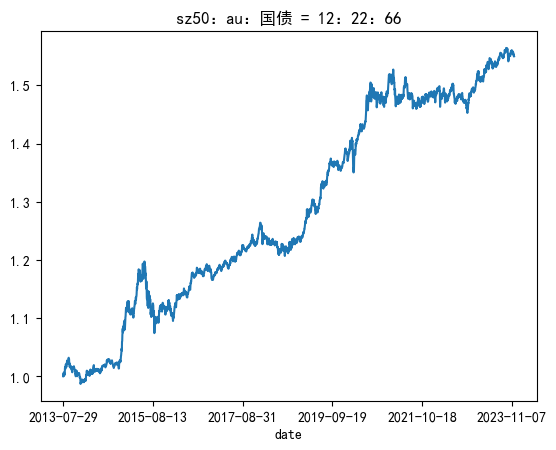

In [11]:
stock_bond_gold_to1 = stock_bond_gold/stock_bond_gold.iloc[0]
(stock_bond_gold_to1.sz50*0.125 + stock_bond_gold_to1.bond_index*.66 + stock_bond_gold_to1.close*.215).plot(title='sz50：au：国债 = 12：22：66')

In [12]:
(stock_bond_gold_to1.sz50*0.125 + stock_bond_gold_to1.bond_index*.66 + stock_bond_gold_to1.close*.215)

date
2013-07-29    1.000000
2013-07-30    1.003075
2013-07-31    1.004262
2013-08-01    1.006016
2013-08-02    1.000647
                ...   
2023-11-17    1.555751
2023-11-20    1.552268
2023-11-21    1.552805
2023-11-22    1.549722
2023-11-23    1.549877
Length: 2513, dtype: float64

In [14]:
sz50_data = ts.get_k_data('sz50',start='2000-01-01',ktype='D').set_index('date')
period=240
period2 = 120

sz50=sz50_data.copy()
sz50['return'] = sz50.close.pct_change()
sz50['pos'] = sz50.close/sz50.close.shift(period)
sz50['posma'] = sz50.pos.rolling(period2).mean()
sz50.dropna(inplace=True)

df_wt = pd.DataFrame(columns=['cash','sz50'],index=sz50.index)
df_wt.iloc[0,0] = 0.5
df_wt.iloc[0,1] = 0.5

df_rt = pd.DataFrame(columns=['cash','sz50'],index=sz50.index)
df_rt['cash'] = 0.00015
df_rt['sz50'] = sz50['return']

for i in sz50.index[1:]:
    df_wt.loc[i,'cash'] = df_wt.shift(1).loc[i,'cash']*(1+df_rt.loc[i,'cash'])
    df_wt.loc[i,'sz50'] = df_wt.shift(1).loc[i,'sz50']*(1+df_rt.loc[i,'sz50'])
    
    if sz50.loc[i,'pos']>sz50.loc[i,'posma']:    #signal[0]:
        df_wt.loc[i,'sz50'] = df_wt.loc[i].sum()
        df_wt.loc[i,'cash'] = 0
    elif sz50.loc[i,'pos']<sz50.loc[i,'posma']:  #signal[1]:
        df_wt.loc[i,'cash'] = df_wt.loc[i].sum()
        df_wt.loc[i,'sz50'] = 0
print(df_wt.T.sum()[-1])

本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2


C:\Users\Lenovo\anaconda3\Lib\site-packages\tushare\stock\trading.py:706: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(_get_k_data(url, dataflag,
C:\Users\Lenovo\anaconda3\Lib\site-packages\tushare\stock\trading.py:706: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(_get_k_data(url, dataflag,
C:\Users\Lenovo\anaconda3\Lib\site-packages\tushare\stock\trading.py:706: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(_get_k_data(url, dataflag,
C:\Users\Lenovo\anaconda3\Lib\site-packages\tushare\stock\trading.py:706: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(_get_k_

19.651891911711207


In [21]:
rll = df_wt.T.sum().T
rll.name='rll'

In [24]:

stock_bond_rll = stock_bond.join(rll).dropna()
stock_bond_rll

,sz50,bond_index,rll
date,,,
2005-07-01,748.05,105.336,1.0
2005-07-04,747.09,105.402,0.999433
2005-07-05,741.21,105.570,0.991567
2005-07-06,734.77,105.829,0.982952
2005-07-07,735.55,106.062,0.983995
...,...,...,...
2023-11-17,2398.20,205.251,19.594942
2023-11-20,2404.77,205.263,19.648624
2023-11-21,2416.24,205.276,19.742341


In [25]:
stock_bond_rll = stock_bond_rll/stock_bond_rll.iloc[0]
stock_bond_rll

,sz50,bond_index,rll
date,,,
2005-07-01,1.0,1.0,1.0
2005-07-04,0.998717,1.000627,0.999433
2005-07-05,0.990856,1.002221,0.991567
2005-07-06,0.982247,1.00468,0.982952
2005-07-07,0.98329,1.006892,0.983995
...,...,...,...
2023-11-17,3.205935,1.948536,19.594942
2023-11-20,3.214718,1.94865,19.648624
2023-11-21,3.230051,1.948773,19.742341


In [32]:
pct = (1/(stock_bond_rll.rolling(240).std()/stock_bond_rll.rolling(240).mean()).median())
pct = pct/pct.sum()

In [33]:
pct

sz50          0.102901
bond_index    0.733440
rll           0.163659
dtype: float64

<Axes: xlabel='date'>

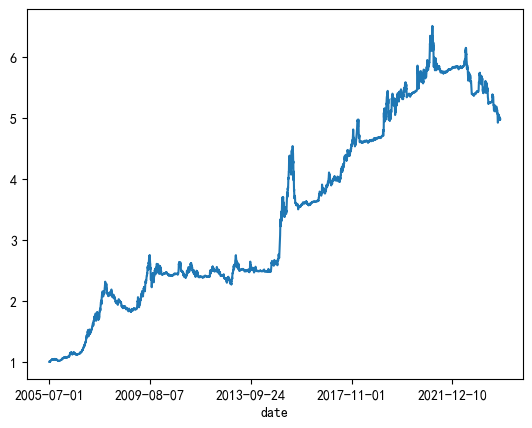

In [34]:
(stock_bond_rll.sz50*pct.sz50 + stock_bond_rll.bond_index*pct.bond_index + stock_bond_rll.rll*pct.rll).plot()